<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Откроем данные для изучения общей информации:

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

Выведем информацию о таблице методами info() и describe():

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [328]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [329]:
print(f'Таблица представляет собой массив из {data.shape[1]} столбцов и {data.shape[0]} строк')
print("")
gap_columns = []
for column in data.columns:
    if data[column].count() < data.shape[0]:
        gap_columns.append(column)
        
print(f'Таблица содержит пропуски в столбцах {gap_columns}. Пропуски в {len(gap_columns)} столбцах из {data.shape[1]}')

full_columns = []
for column in data.columns:
    if data[column].count() == data.shape[0]:
        full_columns.append(column)
print("")
print(f'Полностью заполнены и не содержат пропусков столбцы {full_columns}, всего {len(full_columns)} полностью заполненных столбцов')

Таблица представляет собой массив из 22 столбцов и 23699 строк

Таблица содержит пропуски в столбцах ['ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']. Пропуски в 14 столбцах из 22

Полностью заполнены и не содержат пропусков столбцы ['total_images', 'last_price', 'total_area', 'first_day_exposition', 'rooms', 'floor', 'studio', 'open_plan'], всего 8 полностью заполненных столбцов


### Вывод

* Таблица содержит пропуски в столбцах, 14 столбцов с пропусками против 8 полностью заполненных.

* Данные в столбце 'balcony' - non-null float64 являются вещественными числами, необходимо проверить, что это не число балконов.

* Также имеют неверный тип данных float64, а должен быть int64: last_price, floors_total, cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Для целей дальнейшей обработки необходимо изменить тип данных на целочисленный.

* В столбце 'locality_name' данные представлены строками в разных регистрах. 
* Столбцы 'studio' и  'open_plan',вероятно, являются дублирующими,содержат одинаковое число значений, необходима проверка.
* Наименования столбцов имеют приемлемый вид(нет сочетания строчных и прописных букв, "змеиный" стиль, кроме столбца cityCenters_nearest, соотносятся с информацией в столбцах по смыслу).
* наименование столбца cityCenters_nearest содержит заглавную букву


In [330]:
data['locality_name'].value_counts()

Санкт-Петербург                   15721
посёлок Мурино                      522
посёлок Шушары                      440
Всеволожск                          398
Пушкин                              369
                                  ...  
село Никольское                       1
поселок городского типа Рябово        1
деревня Пельгора                      1
поселок Жилгородок                    1
деревня Терпилицы                     1
Name: locality_name, Length: 364, dtype: int64

Столбец	locality_name — название населённого пункта содержит большое количество населенных пунктов, в том числе с маленьким количеством объектов в продаже. Кроме того, в значениях есть заглавные буквы. Изменим это сразу для удобства обращения к столбцу.Устраняем методом str.lower()

In [331]:
data['locality_name'].str.lower()
data['locality_name'].value_counts().sort_values(ascending = False)

Санкт-Петербург                 15721
посёлок Мурино                    522
посёлок Шушары                    440
Всеволожск                        398
Пушкин                            369
                                ...  
городской посёлок Свирьстрой        1
посёлок Левашово                    1
деревня Сижно                       1
поселок Пчевжа                      1
деревня Терпилицы                   1
Name: locality_name, Length: 364, dtype: int64

In [332]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Судя по значениям False и True, значения в столбце data'is_apartment' должны иметь тип bool. Выполним замену позднее.

## Предобработка данных

### Обработка пропусков

In [333]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Одинаковое количество пропусков в parks_around3000, ponds_around3000 и близкое к ним  cityCenters_nearest может быть связано с особенностями формы для заполнения или выгрузкой

In [334]:
print(data[data['parks_around3000'].isna() == True].head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   
37            10   1990000.0       45.80  2017-10-28T00:00:00      2   
38            10   3150000.0       40.00  2018-03-29T00:00:00      1   
47            17   3600000.0       56.10  2018-10-18T00:00:00      3   
60             3   2740000.0       35.00  2018-01-01T00:00:00      1   
62             0   4800000.0       78.60  2017-09-17T00:00:00      3   
64            13   3100000.0       44.30  2017-11-07T00:00:00      2   
66             6   3450000.0       34.00  2015-12-16T00:00:00      1   
68            11   4150000.0       74.00  2017-08-04T00:00:00   

Оценим долю пропусков

In [335]:
print(5542 / data.shape[0] *100)

23.384952951601335


**Вывод**
Похоже, что по этим столбцам действительно имеется совпадение пропусков. Гипотеза о взаимосвязи пропусков в parks_around3000, ponds_around3000 cityCenters_nearest подтверждается. Мы видим строки с одновременно пропущенными значениями во всех трех столбцах столбцах, и еще в airports_nearest parks_nearest и ponds_nearest.
Пропусков данных больше 23%, это слишком большой процент, чтобы просто выбросить строки с пропусками без потери достоверности данных. 


Начнем со столбца 'locality_name'. Очевидно, что не имея представления в каком городе расположена квартира, оценивать пруды и аэропорты бессмысленно. Заполнить наугад и средним здесь невозможно. радует, что таких строк мало, менее 50.

In [336]:
data_filtered = data.dropna(subset=['locality_name'])

data_filtered.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Пропусков в 'locality_name' не осталось, что ожидаемо. Бонусом исчезли несколько пропусков из других столбцов.

Похожая ситуация  со столбцом 'floors_total'. Здесь у нас не много пропусков, удаляем

In [337]:
data_filtered = data_filtered.dropna(subset=['floors_total'])

In [338]:
data_filtered.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Пропусков в 'floors_total' не осталось, что ожидаемо. Бонусом опять исчезли до 10 пропусков из других столбцов.

Следующий столбец на очереди data['is_apartment']

In [339]:
data_filtered['is_apartment'].value_counts()

False    2710
True       50
Name: is_apartment, dtype: int64

Значения типа False и True. Странно, что они не подгрузились. Чтобы понять, какие значения должны быть - лучше увидеть форму, и какое значение стоит по умолчанию. Так как этой возможности нет, придется обойтись анализом. Судя по огромному количеству пропусков, значения по умолчанию в форме запроса данных нет. Такая ситуация бывает, когда значение выбирается из справочника, и поле не является обязателным. Изначально я бы предположила, что должно быть больше значений True - то есть указывать чаще должны именно апартаменты, поскольку владея такой недвижимостью люди понимают ее особенности, а остальные продавцы могут даже не задумываться об этом. Но у нас явный перевес значений False. Мы явно недооцениваем желание продавцов скрыть часть данных и обсуждать их уже после появления интереса к объекту. Сейчас в базе я.недвижимости по Петербургу 61097 объект жилой недвижимости и 1867 - апартаменты. Примерно такое соотношение должно быть и в нашей таблице, то есть на 23 тысячи значений True должно быть более 600, но здесь мы бессильны. По умолчанию заполняем значением False - такой недвижимости (не-апартаментов) на рынке подавляющее большинство.

In [340]:
data_filtered['is_apartment'] = data_filtered['is_apartment'].fillna(False)
print(data_filtered['is_apartment'].value_counts())
data_filtered['is_apartment'].isna().sum()

False    23515
True        50
Name: is_apartment, dtype: int64


0

Заполним площадь кухни и жилую площадь по медианным значениям в зависимости от метража и комнатности квартиры:

In [341]:
data_filtered['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [342]:
data_filtered['kitchen_area'].median()

9.1

In [343]:
data_filtered['kitchen_area'].std()

5.9006295394457

В процессе проверки данных возникла идея и пришлось вернуться. Что если площадь кухни не указана у студий?

In [344]:
data_filtered[data_filtered['studio'] == True]['kitchen_area'].value_counts()

Series([], Name: kitchen_area, dtype: int64)

In [345]:
data_filtered.query('studio == True & kitchen_area != kitchen_area ')[['last_price', 'studio', 'open_plan', 'kitchen_area', 'living_area', 'total_area']].head()

,last_price,studio,open_plan,kitchen_area,living_area,total_area
144,2450000.0,True,False,NaN,15.50,27.00
440,2480000.0,True,False,NaN,24.75,27.11
608,1850000.0,True,False,NaN,NaN,25.00
697,2500000.0,True,False,NaN,17.50,24.10
716,1500000.0,True,False,NaN,12.00,17.00


Ок, такие имеются, а как обычно определяют размер кухни в студиях, она же там... внутри?

In [346]:
#data[(data['studio'] == True )&(data['kitchen_area'].isna())]['total_area'].count()
data_filtered[(data_filtered['studio'] == True )&(np.isnan(data_filtered['kitchen_area']))]['total_area'].count()

#data.query('studio == True & kitchen_area != kitchen_area ')['total_area'].count()



146

In [347]:
# а точно ли он их находит?
data_filtered[data_filtered['studio'] == True ]['kitchen_area'].value_counts()

Series([], Name: kitchen_area, dtype: int64)

Только nan, тебя-то нам и нужно. Но как обычно измеряют площадь кухни в студии? Отфильтровав в "живой" базе я.недвижимости, сделали вывод: очень по-разному. Как бы не было изображено на планировке (под кухню там отводится и заштриховано до 30% комнаты-студии), если указана жилая площадь - то от этой комнаты отнят еще 1 м2 и все. Так сделаем и мы, приравняем кухни в студиях к 1 м2

In [348]:
print(data_filtered['kitchen_area'].isna().sum())
#data[data['studio'] == True ]['kitchen_area'] = 1 # - попробовали, что-то не получилось, часть пропусков осталась
#data.loc[(data['studio'] == True ])&['kitchen_area']) & (data['parks_around3000'] == 0)

data_filtered.loc[(data_filtered['studio'] == True )&(np.isnan(data['kitchen_area'])), 'kitchen_area'] = 1
data_filtered['kitchen_area'].isna().sum()

2222


2076

Пул ячеек без значений несколько сократился. На всякий случай проверим, нет ли подобных пропусков в жилой площади (на сайте  - есть)

In [349]:
data_filtered.query('studio == True & living_area != living_area ').head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,2,1850000.0,25.0,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,False,...,1.0,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
2409,4,1980000.0,27.0,2018-03-23T00:00:00,0,NaN,18.0,NaN,4,False,...,1.0,NaN,посёлок Петро-Славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3147,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.6,12.0,NaN,12,False,...,1.0,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3874,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.7,3.0,NaN,2,False,...,1.0,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8454,7,2250000.0,19.0,2019-03-12T00:00:00,0,3.0,6.0,NaN,2,False,...,1.0,NaN,Санкт-Петербург,12430.0,7316.0,1.0,238.0,3.0,374.0,44.0


In [350]:
data_filtered[(data_filtered['studio'] == True )&(np.isnan(data_filtered['living_area']))]['total_area'].count()

7

In [351]:
data_filtered.loc[(data['studio'] == True )&(np.isnan(data_filtered['living_area'])), 'living_area'] = data_filtered['total_area']-1 - 3
data_filtered['living_area'].isna().sum()

1858

Посмотрим, с каким показателем сильнее коррелирует площадь кухни:

In [352]:
data_filtered['kitchen_area'].corr(data_filtered['rooms'])

0.28516085164521604

In [353]:
data_filtered['kitchen_area'].corr(data_filtered['living_area'])

0.4320196019058159

In [354]:
data_filtered['kitchen_area'].corr(data_filtered['total_area'])

0.6121553465079078

Выбор очевиден, чем больше площадь квартиры, тем больше площадь кухни. Заполнение в ячейке ниже прошло вторую итерация, так как после заполнения медианным значением, сумма жилой площади и кухни оказалась больше, чем общая. Поэтому изменен порядок: сперва мы заполняем жилую площадь там, где есть данные по кухне, потом жилую площадь вообще, и лишь потом - остаток по кухне. Поэтому ячейка с заполнением по кухне перенесена ниже.

Перейдем на время к жилой площади. Предположение, что отсутствующая жилая площадь характеризует квартиру как апартаменты, мы отбросим, жилая площадь в общем смысле - это площадь всех комнат. Может быть, это студии? Но нет,  было семь совпадений и мы их уже заполнили.

In [355]:
data_filtered[data_filtered['studio'] == True]['living_area'].isna().sum()

0

 А что насчет открытой планировки?

In [356]:
data_filtered['open_plan'].value_counts()

False    23498
True        67
Name: open_plan, dtype: int64

In [357]:
data_filtered[data_filtered['open_plan'] == True]['living_area'].isna().sum()

5

Тоже нет. Тогда пройдемся по корреляциям

In [358]:
data_filtered['living_area'].corr(data_filtered['rooms'])

0.8459213412729086

In [359]:
data_filtered['living_area'].corr(data_filtered['total_area'])

0.9397560520732618

In [360]:
data_filtered['living_area'].corr(data_filtered['kitchen_area'])

0.4320196019058159

Победитель -  общая площадь квартиры, именно с ней наибольшая корреляция показателя жилой площади. На втором месте - число комнат.

In [361]:
print(data_filtered['living_area'].isna().sum())

data_filtered['living_area'] = data['living_area'].fillna(data.groupby(['locality_name','total_area'])['living_area'].transform('median'))
data_filtered['living_area'].isna().sum()

1858


539

Осталось 539 пропусков, где-то не смогли посчитать медиану. Пройдем по комнатам:

In [362]:
data_filtered['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
data_filtered['living_area'].isna().sum()

0

Так как часть данных в столбцах living_area, kitchen_area  мы восстанавливали, выполним некоторые проверки. Проверим, не превысила ли сумма площади кухни и жилой площади общую площадь (там еще санузел и прихожая).

In [363]:
data_filtered['check_area'] =  data_filtered['total_area'] - data_filtered['kitchen_area'] - data_filtered['living_area']
data_filtered['check_area'].describe()

count    21489.000000
mean        15.494679
std         13.300605
min        -29.800000
25%          9.400000
50%         12.600000
75%         17.900000
max        426.000000
Name: check_area, dtype: float64

Минимум в -29 м2 смущает, правда, да и максимум в 426 м. выглядит странным. Сделаем корректировку. Там, где разница между суммой площади кухни и жилой площади и общей площади меньше 2х метров (два метра на санузел с прихожей) - отнимем от общей площади площадь кухни и 2 метра и заменим знасения жилой площади.

In [364]:
data_filtered.loc[(data_filtered['check_area'] < 2),'living_area'] = (
    data_filtered['total_area'] - 
    data_filtered['kitchen_area'] -2)


In [365]:
data_filtered['check_area'] =  data_filtered['total_area'] - data_filtered['kitchen_area'] - data_filtered['living_area']
data_filtered['check_area'].describe()

count    21489.000000
mean        15.533999
std         13.246000
min          2.000000
25%          9.400000
50%         12.600000
75%         17.900000
max        426.000000
Name: check_area, dtype: float64

Снова проверка - минимум теперь как раз 2 метра.

Теперь можно вернуться к площади кухни.

In [366]:
print(data_filtered['kitchen_area'].isna().sum())
data_filtered['kitchen_area'] = data_filtered['kitchen_area'].fillna(data_filtered.groupby(['locality_name','total_area'])['kitchen_area'].transform('median'))
data_filtered['kitchen_area'].isna().sum()

2076


571

Снова не хватило данных, добавим по зависимости от количества комнат с учетом региона:

In [367]:
print(data_filtered['kitchen_area'].isna().sum())
data_filtered['kitchen_area'] = data['kitchen_area'].fillna(data.groupby(['locality_name','rooms'])['kitchen_area'].transform('median'))
data_filtered['kitchen_area'].isna().sum()

571


243

И  медианой от количества комнат без учета региона

In [368]:
print(data_filtered['kitchen_area'].isna().sum())
data_filtered['kitchen_area'] = data_filtered['kitchen_area'].fillna(data_filtered.groupby('total_area')['kitchen_area'].transform('median'))
data_filtered['kitchen_area'].isna().sum()

243


34

Кто же такой упорный остался?

In [369]:
data_filtered[data_filtered['kitchen_area'].isna()]['rooms'].value_counts()

0    32
7     1
2     1
Name: rooms, dtype: int64

Стоп, у нас не было 0-комнатных квартир. Теперь есть?

In [370]:
data_filtered['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Да, я их не заметила, так как столбец, отсортированный по частотности выглядел почти как по-порядку. А по городам?

In [371]:
data_filtered[data_filtered['kitchen_area'].isna()]['locality_name'].value_counts()

Санкт-Петербург                     14
посёлок Мурино                       8
деревня Кудрово                      4
Кудрово                              2
посёлок Парголово                    1
Никольское                           1
городской посёлок Новоселье          1
поселок городского типа Дубровка     1
поселок станции Корнево              1
посёлок Репино                       1
Name: locality_name, dtype: int64

Принимаем решение заполнить от living_area

In [372]:
print(data_filtered['kitchen_area'].isna().sum())
data_filtered['kitchen_area'] = data_filtered['kitchen_area'].fillna(data_filtered.groupby('living_area')['kitchen_area'].transform('median'))
data_filtered['kitchen_area'].isna().sum()

34


4

In [373]:
print(data_filtered['kitchen_area'].isna().sum())
data_filtered['kitchen_area'] = data_filtered['kitchen_area'].fillna(data_filtered.groupby('last_price')['kitchen_area'].transform('median'))
data_filtered['kitchen_area'].isna().sum()

4


0

Проверка

Снова проверяем, не появилась ли отрицательная разница:

In [374]:
data_filtered['check_area'] =  data_filtered['total_area'] - data_filtered['kitchen_area'] - data_filtered['living_area']
data_filtered['check_area'].describe()

count    23565.000000
mean        15.583601
std         15.219609
min        -64.400000
25%          9.000000
50%         12.500000
75%         18.000000
max        467.100000
Name: check_area, dtype: float64

Проверка показывает отрицательные значения.

In [375]:
data_filtered.loc[(data_filtered['check_area'] < 2),'kitchen_area'] = (
    data_filtered['total_area'] - 
    data_filtered['living_area'] -2)


In [376]:
data_filtered['check_area'] =  data_filtered['total_area'] - data_filtered['kitchen_area'] - data_filtered['living_area']
data_filtered['check_area'].describe()

count    23565.000000
mean        15.679139
std         15.095171
min          2.000000
25%          9.000000
50%         12.500000
75%         18.000000
max        467.100000
Name: check_area, dtype: float64

 Такой последовательностью действий мы избавились от превышения суммы кухни и жилой площади - общей площади квартиры. 

**Высота потолков.**

In [377]:
data_filtered['ceiling_height'].value_counts()

2.50      3515
2.60      1645
2.70      1571
3.00      1108
2.80       988
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [378]:
data_filtered['ceiling_height'].isna().sum()

9084

In [379]:
data_filtered['ceiling_height'].min()

1.0

Потолок 1 метр? Это непорядок. По закону потолок не может быть меньше 2.5, но по факту встречаются, и 2 метра. А вот ниже - уже ошибка, изменим несоответствующие значения

In [380]:
data_filtered[data_filtered['ceiling_height'] < 2.5]['ceiling_height'].value_counts()

2.40    23
2.45    15
2.00    11
2.48     8
2.30     4
2.47     3
2.46     2
2.20     1
1.20     1
2.49     1
2.34     1
1.00     1
2.25     1
1.75     1
Name: ceiling_height, dtype: int64

In [381]:
data_filtered[data_filtered['ceiling_height'] < 2] = 2

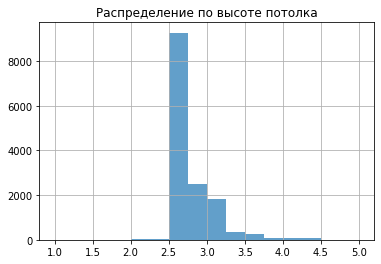

In [382]:
data_filtered['ceiling_height'].hist(bins = [1.0, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.50, 5.0 ], alpha=0.7
                                    ).set_title('Распределение по высоте потолка')
plt.show()

In [383]:
data_filtered['ceiling_height'].median()

2.65

In [384]:
data_filtered['ceiling_height'].mean()

2.771424625371176

In [385]:
data_filtered[data_filtered['ceiling_height'] == 27.5] = 2.75

In [386]:
data_filtered[data_filtered['ceiling_height'] == 100] = data['ceiling_height'].median()

In [387]:
data_filtered[data_filtered['ceiling_height'] > 5] = 5

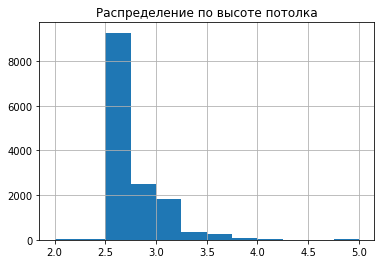

In [388]:
data_filtered['ceiling_height'].hist(bins = 12).set_title('Распределение по высоте потолка')
plt.show()

 Для расчета корреляции здесь и дальше нам понадобится дополнительный столбец цены за квадратный метр, иначе все влияние заглушит шум от метража квартиры. Тут пропусков нет, создаем:

In [389]:
data_filtered['meter_price'] = data_filtered['last_price'] / data['total_area']

In [390]:
ceiling = data_filtered[['ceiling_height', 'rooms', 'living_area','last_price', 'total_area', 'meter_price' ]]

In [391]:
#pd.plotting.scatter_matrix(ceiling, figsize=(9, 9)) 

Корреляция высоты потолка от других величин. Мы видим некоторую зависимость от 'living_area','last_price', 'total_area', но особенно - от meter_price

In [392]:
data_filtered['ceiling_height'].corr(data_filtered['meter_price'])

0.29582081427746787

In [393]:
data_filtered['ceiling_height'].corr(data_filtered['total_area'])

0.4150272152480694

In [394]:
data_filtered['ceiling_height'].corr(data_filtered['last_price'])

0.34614228418570314

Наибольшая корреляция с общей площадью, но не слишком высокая.

In [395]:
data_filtered['ceiling_height'].corr(data_filtered['floor'])

-0.046445511068235454

In [396]:
data_filtered['ceiling_height'].corr(data_filtered['floors_total'])

-0.10048987956957449

В общем, нет у нас твердой опоры. Заполним медианными значениями по группировке общей площади с разбивкой по региональному признаку. 

In [397]:
data_filtered['ceiling_height'] = data_filtered['ceiling_height'].fillna(data_filtered.groupby(['locality_name','total_area'])['ceiling_height'].transform('median'))
data_filtered['ceiling_height'].isna().sum()

2716

In [398]:
data_filtered['ceiling_height'] = data_filtered['ceiling_height'].fillna(data_filtered.groupby(['locality_name','meter_price'])['ceiling_height'].transform('median'))
data_filtered['ceiling_height'].isna().sum()

2609

In [399]:
data_filtered['ceiling_height'] = data_filtered['ceiling_height'].fillna(data_filtered.groupby(['locality_name','rooms'])['ceiling_height'].transform('median'))
data_filtered['ceiling_height'].isna().sum()

264

Остаток - просто медиана.

In [400]:
data_filtered['ceiling_height'] = data_filtered['ceiling_height'].fillna(data_filtered['ceiling_height'].median())
data_filtered['ceiling_height'].isna().sum()

0

Столбец больше не содержит пропусков, пора заняться балконами парками и прудами.

**Время балконов**

In [401]:
data_filtered['balcony'].value_counts()

1.00    4179
0.00    3677
2.00    3649
5.00     335
4.00     181
3.00      81
2.75       1
2.65       1
Name: balcony, dtype: int64

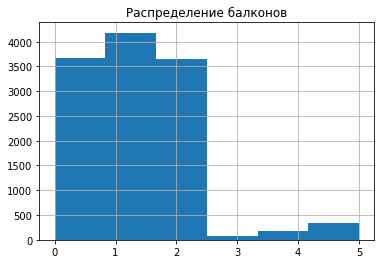

In [402]:
data_filtered['balcony'].hist(bins = 6).set_title('Распределение балконов')

plt.show()

От нуля до 5 балконов. Но если 0 - 1- 2 представлены значительными долями , то 3-4-5 - абсолютное меньшинство.Восстановить данные мы не сможем, слишком много незаполненных значений. В  нашем датафрейме на первом месте квартиры с 1 балконом. 

In [403]:
data_filtered['meter_price'].corr(data_filtered['balcony'])

0.04067606989792491

In [404]:
#data['balcony'] = data['balcony'].fillna(data.groupby('total_area')['balcony'].transform('median'))
data_filtered['balcony'] = data_filtered['balcony'].fillna(data_filtered.groupby('rooms')['balcony'].transform('median'))
data_filtered['balcony'].isna().sum()

5

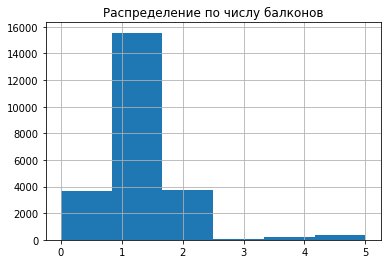

In [405]:
data_filtered['balcony'].hist(bins = 6).set_title('Распределение по числу балконов')

plt.show()

In [406]:
#data['balcony'] = data['balcony'].fillna(data.groupby('total_area')['balcony'].transform('median'))
data_filtered['balcony'] = data_filtered['balcony'].fillna(data_filtered.groupby('rooms')['balcony'].transform('median'))
data_filtered['balcony'].isna().sum()

5

Оставшиеся пять пропущенных значений заменим на число 1

In [407]:
data_filtered['balcony'] = data_filtered['balcony'].fillna(1)
data_filtered['balcony'].isna().sum()

0

Проверим разброс значений в столбце parks_around3000:

In [408]:
data_filtered['parks_around3000'].min()

0.0

In [409]:
data_filtered['parks_around3000'].max()

5.0

От 0 до 3 парков. Так, а корреляция между парками и стоимостью есть? 

In [410]:
data_filtered['meter_price'].corr(data_filtered['parks_around3000'])

0.15504876726281822

Парки не очень влияют на стоимость. А близость парка?

In [411]:
data_filtered['meter_price'].corr(data_filtered['parks_nearest'])

0.019465580295628164

Близость парка - еще меньше.

In [412]:
data_filtered['meter_price'].corr(data_filtered['ponds_around3000'])

0.16803333690314093

Ситуация примерно как и с парками, а близость пруда?

In [413]:
data_filtered['meter_price'].corr(data_filtered['ponds_nearest'])

-0.08977866793827605

Корреляция очень слабая. Теперь посмотрим на близость к центру города и аэропорту:

In [414]:
data_filtered['meter_price'].corr(data_filtered['cityCenters_nearest'])

-0.3080528856654736

In [415]:
data_filtered = data_filtered.dropna(subset=['cityCenters_nearest', 'airports_nearest' ])

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18051 entries, 0 to 23697
Data columns (total 24 columns):
total_images            18051 non-null float64
last_price              18051 non-null float64
total_area              18051 non-null float64
first_day_exposition    18051 non-null object
rooms                   18051 non-null float64
ceiling_height          18051 non-null float64
floors_total            18051 non-null float64
living_area             18051 non-null float64
floor                   18051 non-null float64
is_apartment            18051 non-null object
studio                  18051 non-null object
open_plan               18051 non-null object
kitchen_area            18051 non-null float64
balcony                 18051 non-null float64
locality_name           18051 non-null object
airports_nearest        18051 non-null float64
cityCenters_nearest     18051 non-null float64
parks_around3000        18051 non-null float64
parks_nearest           8032 non-null float64
pond

In [416]:
data_filtered['meter_price'].corr(data_filtered['cityCenters_nearest'])

-0.3077100036916445

Все верно, подтверждается жизненными наблюдениям, чем дальше от центра, тем ниже цена.

In [417]:
data_filtered['meter_price'].corr(data_filtered['airports_nearest'])

-0.028111124468083996

А вот с близостью к аэропорту корреляция очень слабая, ее практически нет.

In [418]:
data_filtered.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest           10019
ponds_around3000            0
ponds_nearest            9001
days_exposition          2299
check_area                  0
meter_price                 0
dtype: int64

И у нас исчезли многие пропуски, связанные с геолокацией. Вот он, наш датафрейм good_data.
Учитывая, что расстояние до центра нам заполнить нечем, эти данные бесполезны для многих видов анализа.
Принимаем решение заполнить пропущенные значания с очень слабым влиянием на цену за кв.м. медианными значениями 

In [419]:
# столбец parks_around3000
#У нас в столбце наблюдаются занчения от 0 до 3

data_filtered['parks_around3000'].value_counts()

0.00    10023
1.00     5629
2.00     1724
3.00      639
5.00       34
2.75        1
2.65        1
Name: parks_around3000, dtype: int64

In [420]:
data_filtered['parks_around3000'].isna().sum()

0

In [421]:
data_filtered.groupby('parks_around3000').median()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,meter_price
parks_around3000,,,,,,,,,,,,,,,,,,
0.00,10.00,4900000.00,51.10,2.00,2.64,10.00,30.00,5.00,9.40,1.00,26876.00,14489.00,3127.00,0.00,549.50,91.00,12.70,99677.419355
1.00,10.00,5650000.00,55.70,2.00,2.65,9.00,31.20,4.00,9.40,1.00,26815.00,11793.00,501.00,1.00,499.50,102.00,13.30,104629.629630
2.00,10.00,6200000.00,60.00,2.00,2.70,6.00,35.29,4.00,9.40,1.00,27437.00,10180.50,365.50,1.00,410.00,105.50,13.50,107170.990935
2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,0.106000
2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,0.065476
3.00,10.00,7850000.00,68.90,2.00,2.90,5.00,41.00,3.00,10.00,1.00,24796.00,6951.00,305.00,2.00,379.00,143.00,15.00,107632.093933
5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.091586


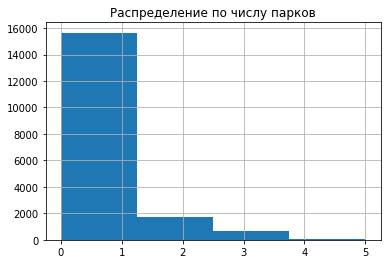

In [422]:
data_filtered['parks_around3000'].hist(bins = 4).set_title('Распределение по числу парков')
plt.show()

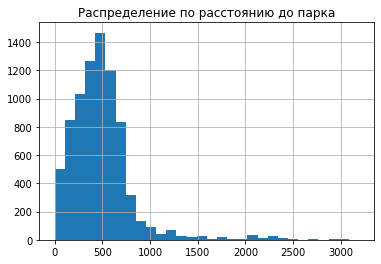

In [423]:
data_filtered['parks_nearest'].hist(bins = 30).set_title('Распределение по расстоянию до парка')
plt.show()

График расстояния до ближайшего парка имеет правильный вид, вот только он не соотносится с данными о наличии парка. По данным предыдущего столбца у нас свыше 9000 объектов без парка вообще. но это не увязывается с тем, что "хвост" графика свыше 3000 м практически отсутствует. Примем во внимание, что геолокация могла сама измерить расстояние, а человек при заполнении мог не заполнить графу про парки. Тогда нужно присвоить значения, хотя бы 1 парк в столбце parks_around3000, если расстояние до него меньше 3000

In [424]:
data_filtered.query('(parks_nearest < 3000 )& (parks_around3000 == 0)')['parks_around3000'].count()

0

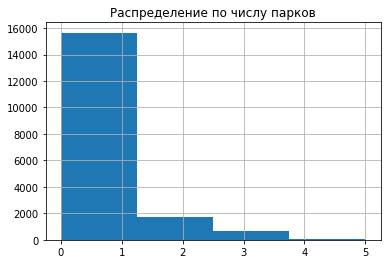

In [425]:
data_filtered.loc[(data_filtered['parks_nearest'] < 3000) & (data_filtered['parks_around3000'] == 0), 'parks_around3000'] = 1
data_filtered['parks_around3000'].hist(bins = 4).set_title('Распределение по числу парков')
plt.show()

Минус 168 значений, немного. У нас нет определения парка, недвижимость может находиться в местах, где может быть лес, но статуса парка у него нет. Кроме Санкт-Петербурга, парк(лес)  в пределах 3 км есть везде. Применим метод loc для замены

In [426]:
data_filtered.query('(locality_name == "санкт-петербург")& (parks_around3000 == 0)')['parks_around3000'].count()

0

In [427]:
data_filtered.loc[(data_filtered['locality_name'] != 'санкт-петербург')&(data_filtered['parks_around3000'].isna()), 'parks_around3000'] = 1


In [428]:
data_filtered['parks_around3000'].isna().sum()

0

In [429]:
data_filtered['parks_around3000'].value_counts()

0.00    10023
1.00     5629
2.00     1724
3.00      639
5.00       34
2.75        1
2.65        1
Name: parks_around3000, dtype: int64

Итак, число квартир c 1 парком поблизости возросло. Наверное, если  парка нет, то и расстояние до него равно 0. Но так ли это в нашем столбце parks_nearest до замен? Нет, до замены если парка нет, то до него идти и идти - больше трех километров. 

In [430]:
print(data_filtered['parks_nearest'].min())
print(data_filtered['parks_nearest'].max())


1.0
3190.0


От одного метра до 3 с лишним километров, нулей нет. И это правильно, ведь мы отмечали парки ближе 3 км, если таких парков нет - расстояние больше. Тогда нам поможет медианное значение, равное 3127 если парков нет.

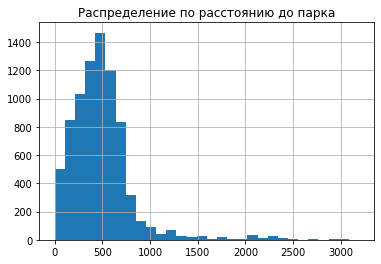

In [431]:
data_filtered['parks_nearest'].hist(bins = 30).set_title('Распределение по расстоянию до парка')
plt.show()

In [432]:
#data.loc[data['parks_around3000'] > 0, 'parks_nearest'] = data['parks_nearest'].median()
#data.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 3127

data_filtered.loc[data['parks_around3000'] == 0, 'parks_nearest'] = 3127
data_filtered['parks_nearest'].isna().sum()
data_filtered['parks_nearest'].isna().sum()

0

Итак, расстояние до ближайшего парка заполнено, число парков - тоже. Проведем похожие действия с прудами.

In [433]:
data_filtered['ponds_around3000'].value_counts()

0.00    9001
1.00    5654
2.00    1881
3.00    1479
5.00      34
2.75       1
2.65       1
Name: ponds_around3000, dtype: int64

In [434]:
data_filtered.groupby('ponds_around3000').median()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_nearest,days_exposition,check_area,meter_price
ponds_around3000,,,,,,,,,,,,,,,,,,
0.00,10.00,4980000.00,51.80,2.00,2.625,9.00,30.40,5.00,9.00,1.00,28959.00,13449.00,0.00,3127.00,NaN,91.00,12.500,100000.000000
1.00,10.00,5250000.00,53.00,2.00,2.650,9.00,30.50,5.00,9.40,1.00,24254.50,12865.50,0.00,3127.00,594.00,96.00,12.845,101717.631497
2.00,10.00,5950000.00,58.10,2.00,2.700,9.00,32.30,4.00,10.00,1.00,26956.00,13862.00,1.00,888.00,436.00,102.00,14.200,104624.929498
2.65,2.65,2.65,2.65,2.65,2.650,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.65,2.650,0.106000
2.75,2.75,2.75,2.75,2.75,2.750,2.75,2.75,2.75,2.75,2.75,2.75,2.75,2.75,3127.00,2.75,2.75,2.750,0.065476
3.00,10.00,8000000.00,70.00,2.00,2.800,6.00,38.20,4.00,11.00,1.00,26196.00,7251.00,1.00,496.00,307.00,125.00,17.000,116822.429907
5.00,5.00,5.00,5.00,5.00,5.000,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.000,0.091586


От одного до трех прудов в непосредственной близости.

In [435]:
print(f'Максимальное значение в столбце ponds_nearest {data_filtered["ponds_nearest"].max()}')

Максимальное значение в столбце ponds_nearest 1344.0


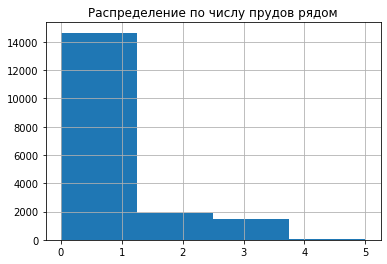

In [436]:
data_filtered['ponds_around3000'].hist(bins = 4).set_title('Распределение по числу прудов рядом')
plt.show()

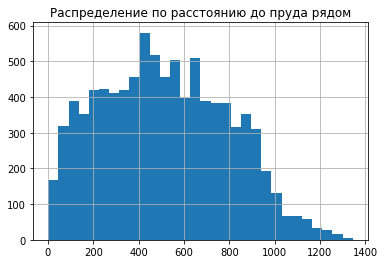

In [437]:
data_filtered['ponds_nearest'].hist(bins = 30).set_title('Распределение по расстоянию до пруда рядом')
plt.show()

Как видно из таблицы выше , столбец ponds_nearest имеет значения NaN, если прудов поблизости до 3 км ноль. Заменим эти значения значениями выше 3000 км, возьмем 3500 как превышающее и отсутствующее сейчас в столбце (максимум - 1344)

In [438]:
#data.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = 3500
data_filtered.loc[data['ponds_around3000'] == 0, 'ponds_nearest'] = 3500

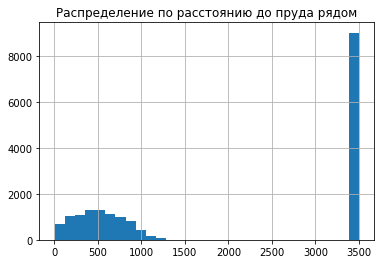

In [439]:
data_filtered['ponds_nearest'].hist(bins = 30).set_title('Распределение по расстоянию до пруда рядом')
plt.show()

In [440]:
data_filtered.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2299
check_area                 0
meter_price                0
dtype: int64

Пропусков данных всё меньше.

Остался только  столбец days_exposition.

In [441]:
data_filtered[data_filtered['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,check_area,meter_price
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.0,8.0,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,32.00,120370.370370
7,5.0,7915000.0,71.60,2019-04-18T00:00:00,2.0,2.80,24.0,30.5,22.0,False,...,Санкт-Петербург,23982.0,11634.0,0.0,3127.0,0.0,3500.0,NaN,22.20,110544.692737
44,13.0,5350000.0,40.00,2018-11-18T00:00:00,1.0,2.70,22.0,17.6,3.0,False,...,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,13.00,133750.000000
45,17.0,5200000.0,50.60,2018-12-02T00:00:00,2.0,2.65,9.0,30.3,7.0,False,...,Санкт-Петербург,30011.0,12872.0,0.0,3127.0,0.0,3500.0,NaN,13.30,102766.798419
46,17.0,6600000.0,52.10,2019-01-31T00:00:00,2.0,2.60,24.0,29.7,9.0,False,...,Санкт-Петербург,15114.0,12702.0,0.0,3127.0,0.0,3500.0,NaN,14.10,126679.462572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10.0,5950000.0,56.00,2019-03-05T00:00:00,3.0,2.65,8.0,32.1,3.0,False,...,Санкт-Петербург,32139.0,9217.0,0.0,3127.0,2.0,303.0,NaN,15.40,106250.000000
23680,14.0,5000000.0,59.00,2019-04-04T00:00:00,3.0,2.50,5.0,50.0,1.0,False,...,Санкт-Петербург,26835.0,11878.0,0.0,3127.0,0.0,3500.0,NaN,2.00,84745.762712
23684,20.0,21400000.0,145.00,2018-11-02T00:00:00,4.0,3.00,26.0,71.4,17.0,False,...,Санкт-Петербург,11827.0,11459.0,0.0,3127.0,0.0,3500.0,NaN,58.00,147586.206897
23685,15.0,2490000.0,31.00,2019-01-24T00:00:00,1.0,2.50,5.0,17.3,5.0,False,...,Ломоносов,48393.0,51818.0,0.0,3127.0,0.0,3500.0,NaN,8.10,80322.580645


In [442]:
data_filtered['days_exposition'].std()

223.21235964899756

In [443]:
data_filtered['days_exposition'].describe()

count    15752.000000
mean       181.900292
std        223.212360
min          1.000000
25%         43.000000
50%         95.000000
75%        232.000000
max       1572.000000
Name: days_exposition, dtype: float64

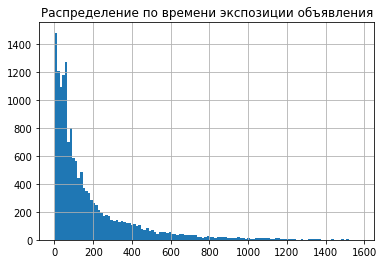

In [444]:
data_filtered['days_exposition'].hist(bins = 120).set_title('Распределение по времени экспозиции объявления')
plt.show()

Максимум - целых 1572 дня?  - бывает, я лично наблюдаю за предложениями в интересующем меня доме, и три из них "висят" больше трех лет, а одно с 2016 года. А вот пик около нулевых значений выглядит подозрительно. Квартира - не пирожок, очень редко объявление снимается в тот же день. Объявление - просмотр - договор о задатке - снятие объявления, это требует времени. Менять и отбрасывать здесь нечего, но следует присмотреться к значениям позднее, возможно размещение фиктивных объявлений с целью манипуляции рыночной стоимостью и другие нарушения(например, дубликаты от недобросовестных риэлторов, которые блокируются собственниками). Кстати, а что у нас с дубликатами?

In [445]:
print(data_filtered.duplicated().sum())

2


105 дубликатов. Немного, но, конечно, следовало избавиться от них еще раньше. Избавимся теперь:

In [446]:
data_filtered = data_filtered.drop_duplicates().reset_index(drop=True)
data_filtered.duplicated().sum()

0

Вернемся к дням размещения. Попробуем создать базу для "наполнения"

In [447]:
data_filtered['days_exposition'].corr(data_filtered['meter_price'])

0.06372593326477854

In [448]:
data_filtered['days_exposition'].corr(data_filtered['rooms'])

0.12923876706260934

In [449]:
data_filtered['days_exposition'].corr(data_filtered['total_area'])

0.16343602656306438

In [450]:
data_filtered['days_exposition'].corr(data_filtered['last_price'])

0.08721333467951758

Конечно, может мешать пик значений около нуля, немного отфильтруем:

In [451]:
data_filtered[data_filtered['days_exposition'] > 6]['days_exposition'].corr(data_filtered['meter_price'])

0.06058720530040141

In [452]:
data_filtered[data_filtered['days_exposition'] > 6]['days_exposition'].corr(data_filtered['rooms'])

0.13271501400274807

In [453]:
data_filtered[data_filtered['days_exposition'] > 6]['days_exposition'].corr(data_filtered['total_area'])

0.160276428709481

In [454]:
data_filtered[data_filtered['days_exposition'] > 6]['days_exposition'].corr(data_filtered['living_area'])

0.14898924383985782

In [455]:
data_filtered[data_filtered['days_exposition'] > 6]['days_exposition'].corr(data_filtered['last_price'])


0.08552008065247127

Да нет, не особенно сказывается пик. Неоторая корреляция есть с площадью квартиры - маленькие квартиры продаются быстрее, а большие  дольше. Воспользуемся этим новым знанием и любимой медианой:

In [456]:
data_filtered['days_exposition'] = data_filtered['days_exposition'].fillna(data.groupby(['locality_name', 'total_area'])['days_exposition'].transform('median'))

In [457]:
data_filtered['days_exposition'].isna().sum()

95

In [458]:
data_filtered[data_filtered['days_exposition'].isna()]['locality_name'].value_counts()

Санкт-Петербург      81
посёлок Парголово     3
Пушкин                3
Колпино               2
посёлок Шушары        2
посёлок Понтонный     1
Красное Село          1
Кронштадт             1
посёлок Стрельна      1
Name: locality_name, dtype: int64

In [459]:
data_filtered[data_filtered['days_exposition'].isna()]['total_area'].value_counts()

90.0    3
55.4    2
40.0    2
38.0    2
30.9    2
       ..
48.4    1
77.4    1
33.1    1
42.4    1
85.0    1
Name: total_area, Length: 85, dtype: int64

Насколько странно, не "зацепило" Петербург, да и площади квартир довольно средние.

In [460]:
data_filtered['days_exposition'] = data_filtered['days_exposition'].fillna(data.groupby(['locality_name', 'living_area'])['days_exposition'].transform('median'))

In [461]:
data_filtered['days_exposition'].isna().sum()

72

In [462]:
data_filtered[data_filtered['days_exposition'].isna()]['locality_name'].value_counts()

Санкт-Петербург      61
Пушкин                3
посёлок Парголово     2
посёлок Шушары        2
Колпино               1
посёлок Понтонный     1
Кронштадт             1
посёлок Стрельна      1
Name: locality_name, dtype: int64

In [463]:
data_filtered['days_exposition'] = data_filtered['days_exposition'].fillna(data.groupby(['rooms'])['days_exposition'].transform('median'))

In [464]:
data_filtered['days_exposition'].isna().sum()

0

In [465]:
data_filtered[data_filtered['days_exposition'].isna()]['rooms'].value_counts()

Series([], Name: rooms, dtype: int64)

Оставшийся десяток заполним медианой столбца

In [466]:
data_filtered['days_exposition'] = data_filtered['days_exposition'].fillna(data_filtered['days_exposition'].median())

In [467]:
data_filtered['days_exposition'].isna().sum()

0

Еще раз с гордостью осмотрим готовую таблицу:

In [468]:
data_filtered.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
check_area              0
meter_price             0
dtype: int64

И мы приступаем к следующему этапу

### Изменение типа данных

Изменим тип данных в столбцax на integer.  Проверяем полученный результат, вызвав метод info()
Используем метод astype, так как у нас в столбцах уже вещественные числа float, которые мы хотим превратить в натуральные - integer

In [469]:
wrong_type_list_float = ['total_images','total_area', 'last_price', 'rooms', 'floors_total', 'cityCenters_nearest', 'living_area', 'floor', 'kitchen_area', 'balcony', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'meter_price']
for column in wrong_type_list_float:
    data_filtered[column] = data_filtered[column].astype('int')

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18049 entries, 0 to 18048
Data columns (total 24 columns):
total_images            18049 non-null int64
last_price              18049 non-null int64
total_area              18049 non-null int64
first_day_exposition    18049 non-null object
rooms                   18049 non-null int64
ceiling_height          18049 non-null float64
floors_total            18049 non-null int64
living_area             18049 non-null int64
floor                   18049 non-null int64
is_apartment            18049 non-null object
studio                  18049 non-null object
open_plan               18049 non-null object
kitchen_area            18049 non-null int64
balcony                 18049 non-null int64
locality_name           18049 non-null object
airports_nearest        18049 non-null int64
cityCenters_nearest     18049 non-null int64
parks_around3000        18049 non-null int64
parks_nearest           18049 non-null int64
ponds_around3000        18049

Теперь переведем в логические значения столбцы 'is_apartment','studio', 'last_price', 'open_plan'

In [470]:
wrong_type_list_object = ['is_apartment','studio', 'open_plan']
for column in wrong_type_list_object:
    data_filtered[column] = data_filtered[column].astype('bool')

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18049 entries, 0 to 18048
Data columns (total 24 columns):
total_images            18049 non-null int64
last_price              18049 non-null int64
total_area              18049 non-null int64
first_day_exposition    18049 non-null object
rooms                   18049 non-null int64
ceiling_height          18049 non-null float64
floors_total            18049 non-null int64
living_area             18049 non-null int64
floor                   18049 non-null int64
is_apartment            18049 non-null bool
studio                  18049 non-null bool
open_plan               18049 non-null bool
kitchen_area            18049 non-null int64
balcony                 18049 non-null int64
locality_name           18049 non-null object
airports_nearest        18049 non-null int64
cityCenters_nearest     18049 non-null int64
parks_around3000        18049 non-null int64
parks_nearest           18049 non-null int64
ponds_around3000        18049 non-n

В столбце first_day_exposition нераспознанные даты. Применим метод to_datetime. Время публикации в столбце не учитывается, да и в дальнейшем нам понадобятся только день недели, месяц и год публикации объявления.

In [471]:
data_filtered['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [472]:
data_filtered['first_day_exposition'] = pd.to_datetime(data_filtered['first_day_exposition'], format='%Y-%m-%d')
data_filtered['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Исправим заглавные буквы

In [473]:
data_filtered.columns  = data_filtered.columns.str.lower()
data_filtered.columns 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'check_area', 'meter_price'],
      dtype='object')

In [474]:
data_filtered['locality_name'] = data_filtered['locality_name'].str.lower()
data_filtered['locality_name']

0        санкт-петербург
1         посёлок шушары
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
18044    санкт-петербург
18045    санкт-петербург
18046           петергоф
18047    санкт-петербург
18048    санкт-петербург
Name: locality_name, Length: 18049, dtype: object

## Расчёты и добавление результатов в таблицу

Нужно добавить: 
•	цену квадратного метра;
•	день недели, месяц и год публикации объявления;
•	этаж квартиры; варианты — первый, последний, другой;
•	соотношение жилой и общей площади, а также отношение площади кухни к общей.
Цена квадратного метра была добавлена еще в начале нашего исследования. Пора рассчитать остальные значения.

**день недели, месяц и год публикации объявления**

In [475]:
data_filtered['first_day_year'] = pd.DatetimeIndex(data_filtered['first_day_exposition']).year # добавляем столбец года
data_filtered['first_day_month'] = pd.DatetimeIndex(data_filtered['first_day_exposition']).month # добавляем столбец месяца
data_filtered['first_day_day'] = pd.DatetimeIndex(data_filtered['first_day_exposition']).day # добавляем столбец дня


In [476]:
data_filtered[['first_day_year','first_day_month','first_day_day', 'first_day_exposition']]

,first_day_year,first_day_month,first_day_day,first_day_exposition
0,2019,3,7,2019-03-07
1,2018,12,4,2018-12-04
2,2015,8,20,2015-08-20
3,2015,7,24,2015-07-24
4,2018,6,19,2018-06-19
...,...,...,...,...
18044,2018,7,19,2018-07-19
18045,2016,10,13,2016-10-13
18046,2016,8,5,2016-08-05
18047,2017,3,21,2017-03-21


**этаж квартиры**

Укажем категорию этажа квартиры — первый, последний, другой

In [477]:
def create_category_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data_filtered['categorized_floor'] = data_filtered.apply(create_category_floor, axis=1)


In [478]:
display(data_filtered['categorized_floor'])
data_filtered['categorized_floor'].value_counts()

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
18044    другой
18045    другой
18046    другой
18047    другой
18048    другой
Name: categorized_floor, Length: 18049, dtype: object

другой       13712
последний     2350
первый        1987
Name: categorized_floor, dtype: int64

**соотношение жилой и общей площади**

In [479]:
data_filtered['living_area_correlation'] = data_filtered['living_area'] / data_filtered['total_area']

**отношение площади кухни к общей**

In [480]:
data_filtered['kitchen_area_correlation'] = data_filtered['kitchen_area'] / data_filtered['total_area']

И еще раз осмотрим информацию о датафрейме

In [481]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18049 entries, 0 to 18048
Data columns (total 30 columns):
total_images                18049 non-null int64
last_price                  18049 non-null int64
total_area                  18049 non-null int64
first_day_exposition        18049 non-null datetime64[ns]
rooms                       18049 non-null int64
ceiling_height              18049 non-null float64
floors_total                18049 non-null int64
living_area                 18049 non-null int64
floor                       18049 non-null int64
is_apartment                18049 non-null bool
studio                      18049 non-null bool
open_plan                   18049 non-null bool
kitchen_area                18049 non-null int64
balcony                     18049 non-null int64
locality_name               18012 non-null object
airports_nearest            18049 non-null int64
citycenters_nearest         18049 non-null int64
parks_around3000            18049 non-null int64


## Исследовательский анализ данных

Изучаем данные: площадь, цена, число комнат, высота потолков

**Площадь**

Данные, характеризующие площадь квартир собраны в столбцах: total_area, living_area, kitchen_area и столбцами с их соотношением. Так как часть данных мы восстанавливали, выполним некоторые проверки.

Так как данные по общей площади были изначально, проверим сперва их.

In [482]:
data_filtered['total_area'].describe()

count    18049.000000
mean        62.881711
std         38.416327
min          2.000000
25%         41.000000
50%         54.000000
75%         73.000000
max        900.000000
Name: total_area, dtype: float64

Площадь 900 м2, кому-то повезло... или ошибка? 

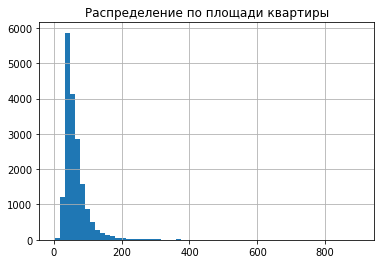

In [483]:
data_filtered['total_area'].hist(bins = 60).set_title('Распределение по площади квартиры')
plt.show()

In [484]:
data_filtered[['total_area', 'living_area', 'kitchen_area' ] ].sort_values(by = 'total_area' ).head(20)

,total_area,living_area,kitchen_area
17209,2,2,2
16290,2,2,2
17426,2,2,2
4363,2,2,2
12942,2,2,2
9624,5,5,5
7157,5,5,5
4013,5,5,5
270,5,5,5
792,5,5,5


Минимум таблицы выглядит неестественно. квартира 2 метра? Но так как я не специалист по предложениям на рынке недвижимости - отправляемся на Я. недвижимость. В базе по СПб и ЛО отсутствуют одъекты до 12 м2, только с 12 м2 начинается отсчет. И, взглянув на описание в базе Яндекса я вдруг поняла, что площадь кухни может быть не указана для студий. Вернемся к обработке пропусков, раздел 2.1.

In [485]:
data_filtered[['total_area', 'living_area', 'kitchen_area', 'last_price' ] ].sort_values(by = 'total_area' ).tail(20)

,total_area,living_area,kitchen_area,last_price
11219,401,204,24,401300000
10754,402,300,56,51000000
10488,410,218,40,240000000
11452,413,74,13,45000000
16859,422,91,16,27000000
2803,441,63,35,28789000
15474,460,279,55,20000000
4749,470,248,40,34000000
513,483,312,26,49950000
5058,488,216,50,99000000


А вот "хвост" цены не кажется невозможным - на рынке и сейчас присутствуют объекты выше 300 м2. Однако наряду с похожими на реальные строки, есть строки, выглядящие так, будто кто-то пропустил разделитель разрядов: площадь 494 м, кухня 9 м идр. Однако, у нас слишком мало оснований для фильтрации, но и значений выше 600 м2 очень мало. Принимаем решение избавиться от значений до 12 м2 и свыше 600

In [486]:
print(data_filtered.shape[0])
data_filtered = data_filtered.query('12 <= total_area <= 600')
data_filtered.shape[0]

18049


18008

А ещё пора почистить столбцы от проверочных:

In [487]:
data_filtered.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'check_area', 'meter_price',
       'first_day_year', 'first_day_month', 'first_day_day',
       'categorized_floor', 'living_area_correlation',
       'kitchen_area_correlation'],
      dtype='object')

Уберем 'check_area'

In [488]:
print(data_filtered.shape[1])
data_filtered = data_filtered[['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'meter_price', 'first_day_year',
       'first_day_month', 'first_day_day', 'categorized_floor',
       'living_area_correlation', 'kitchen_area_correlation' ]]
data_filtered.shape[1]

30


29

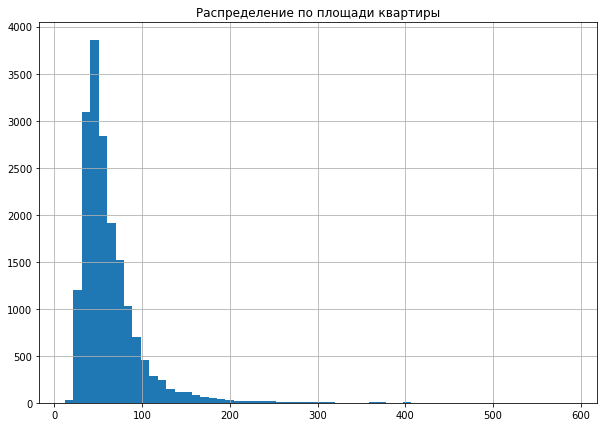

In [489]:
data_filtered['total_area'].hist(bins = 60, figsize=(10,7)).set_title('Распределение по площади квартиры')

plt.show()

График распределения количества квартир в зависимости от метража выглядит нормальным распределением.
Посмотрим на корреляцию параметров между собой. Рассчитаем медиану значений по отношению к числу комнат.

In [490]:
stat_multi = data_filtered.pivot_table(index='rooms', 
                                       values=['last_price', 'total_area', 'living_area', 'kitchen_area' ], 
                                       aggfunc=['median'])
stat_multi.columns = ['kitchen_area', 'last_price', 'living_area' ,'total_area' ]
print(stat_multi)

       kitchen_area  last_price  living_area  total_area
rooms                                                   
0               6.0     3252500         18.0        27.0
1               9.0     3950000         17.0        37.0
2               9.0     5400000         30.0        54.0
3              10.0     6800000         45.0        74.0
4              12.0     9825000         63.0       103.0
5              16.0    14300000         91.0       149.0
6              19.0    19000000        123.0       186.0
7              20.0    23000000        145.0       210.0
8              24.0    23095000        161.0       235.5
9              14.0    23750000        179.0       300.5
10             19.0    23000000        161.0       272.0
11             12.0    25250000        133.5       188.5
14             20.5    26829500        195.0       304.0
15            100.0    65000000        409.0       590.0
16             13.0    28500000        180.0       270.0
19             27.0    32250000

In [491]:
print(stat_multi.corr()) 

              kitchen_area  last_price  living_area  total_area
kitchen_area      1.000000    0.880598     0.840281    0.822812
last_price        0.880598    1.000000     0.982594    0.973257
living_area       0.840281    0.982594     1.000000    0.995436
total_area        0.822812    0.973257     0.995436    1.000000


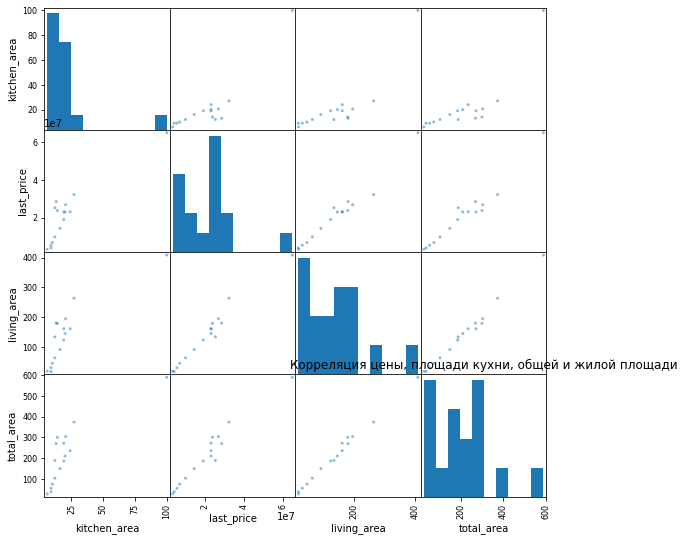

In [492]:
pd.plotting.scatter_matrix(stat_multi, figsize=(9, 9))
plt.title('Корреляция цены, площади кухни, общей и жилой площади')
plt.show()


Все параметры имеют высокую корреляцию друг с другом, что видно на графике и в таблице. Разброс начинается после того, как площадь квартиры становится больше 100 м. Сильнее всего корреляция жилой и общей площади - 0,99. Чуть ниже - 0.98 - корреляция цены и жилой площади . И бронзу с небольшим отрывом получает корреляция цены и общей площади. Но минуточку, ведь  эти параметры участвовали в заполнении пропусков. 


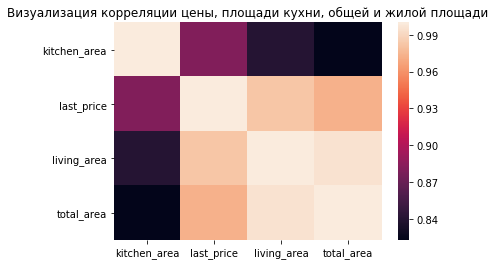

In [493]:
sns.heatmap(stat_multi.corr())
plt.title('Визуализация корреляции цены, площади кухни, общей и жилой площади')
plt.show()

Проверили, что наш исходный массив по-прежнему содержит пропуски и годится для сравнения.

In [495]:
stat_multi_before = data.dropna(subset = ['kitchen_area',  'living_area']).pivot_table(index='rooms', 
                                       values=['last_price', 'total_area', 'living_area', 'kitchen_area' ], 
                                       aggfunc=['median'])
stat_multi_before.columns = ['kitchen_area', 'last_price', 'living_area' ,'total_area'  ]
print(stat_multi_before)

       kitchen_area   last_price  living_area  total_area
rooms                                                    
1              9.00    3600000.0        17.60       36.80
2              8.70    4790000.0        30.50       53.00
3              9.50    6200000.0        45.00       72.70
4             11.00    9000000.0        63.50       98.90
5             15.25   14000000.0        93.05      147.35
6             19.30   18888500.0       123.75      182.85
7             20.00   24000000.0       145.00      211.00
8             25.00   22190000.0       160.00      235.00
9             14.30   24000000.0       179.20      309.70
10            19.80   23000000.0       161.40      272.60
11            12.60   25250000.0       133.90      188.90
12           112.00  420000000.0       409.70      900.00
14            21.25   26829500.0       195.15      304.20
15           100.00   65000000.0       409.00      590.00
16            13.00   28500000.0       180.00      270.00
19            

In [496]:
print(stat_multi_before.corr()) 

              kitchen_area  last_price  living_area  total_area
kitchen_area      1.000000    0.802126     0.892252    0.920864
last_price        0.802126    1.000000     0.675450    0.854751
living_area       0.892252    0.675450     1.000000    0.956280
total_area        0.920864    0.854751     0.956280    1.000000


In [497]:
#pd.plotting.scatter_matrix(stat_multi, figsize=(9, 9)) 

Места примерно те же, сильнее всего была корреляция жилой и общей площади - 0,96. Чуть ниже - 0.92 -  площади кухни и общей. И бронзу с небольшим отрывом получает корреляция общей площади и кухни. Но мы выкинули много значений  

In [498]:
data['last_price'].corr(data['total_area'])

0.6536750579657244

In [499]:
stat_multi_before_full = data.pivot_table(index='rooms', 
                                       values=['last_price', 'total_area'], 
                                       aggfunc=['median'])
stat_multi_before_full.columns = [ 'last_price' ,'total_area'  ]
print(stat_multi_before_full)

        last_price  total_area
rooms                         
0        2700000.0       26.05
1        3600000.0       36.56
2        4770169.0       53.00
3        6200000.0       73.00
4        9000000.0       99.30
5       14000000.0      146.45
6       19000000.0      184.30
7       24900000.0      214.00
8       23095000.0      235.70
9       23750000.0      300.95
10      23000000.0      272.60
11      25250000.0      188.90
12     420000000.0      900.00
14      26829500.0      304.20
15      65000000.0      590.00
16      28500000.0      270.00
19      32250000.0      374.60


In [500]:
print(stat_multi_before_full.corr()) 

            last_price  total_area
last_price     1.00000     0.84916
total_area     0.84916     1.00000


**Диаграмма разброса исходного датафрейма**

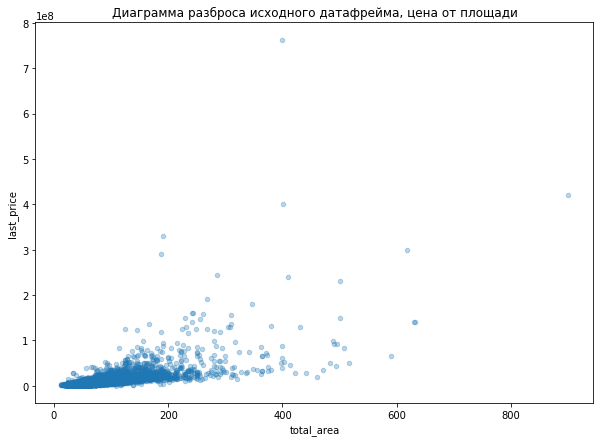

In [501]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса исходного датафрейма, цена от площади')
plt.show()

**Диаграмма разброса подготовленного датафрейма**

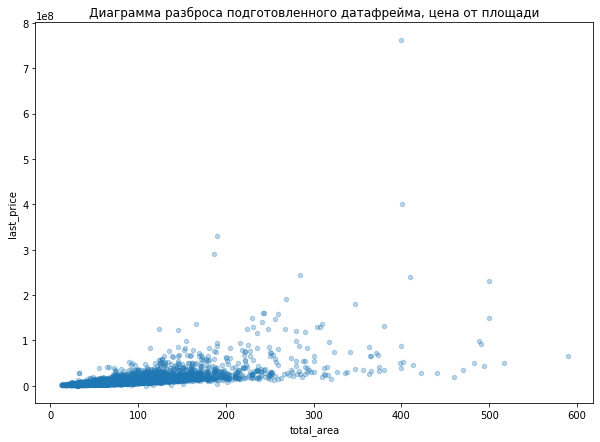

In [502]:
data_filtered.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса подготовленного датафрейма, цена от площади')
plt.show()

Интересно, что корреляция суммы продажи и общей площади до чистки все-таки была ниже. Мы не меняли значения в этих столбцах, но избавились от ряда выбивающихся данных. На графике отчетливо видна корреляция величин, разброс по цене начинается с квартир свыше 100 м2 и продолжает нарастать. Это объяснимо, и может быть связано с неоднородностью недвижимости в данном сегменте (от старых коммунальных квартир до элитной недвижимости).
Так как параметры жилой площади и общей связаны, при анализе можно использовать один из них, наиболее интересующий.


Пора взглянуть на такой интересный показатель как цена за квадратный метр. Общепринято считать, что наиболее дорогим активом с точки зрения цены за м2 являются квартиры до двух комнат. С ростом площади цена за м2 падает. Так ли это?

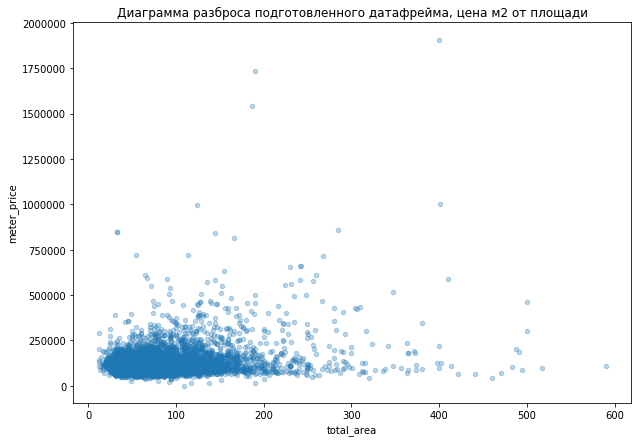

In [503]:
data_filtered.plot(x='total_area', y='meter_price', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса подготовленного датафрейма, цена м2 от площади')
plt.show()

In [504]:
price_mean = data_filtered.pivot_table(index='total_area', values='meter_price', aggfunc=['median', 'mean'])
price_mean.columns = ['median price', 'mean price']
display(price_mean)

,median price,mean price
total_area,,
12,200000.0,200000.00
13,135017.0,167508.25
14,85000.0,85000.00
15,130698.5,130698.50
16,131250.0,131250.00
...,...,...
491,185488.0,185488.00
494,87401.0,87401.00
500,380000.0,380000.00


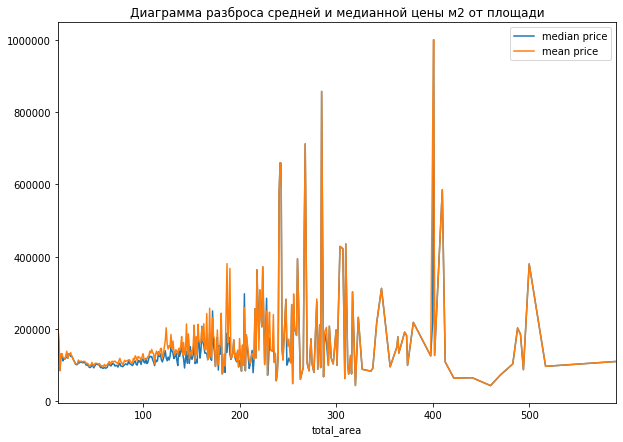

In [505]:
price_mean.plot( y=['median price', 'mean price'], kind = 'line', figsize = (10, 7))
plt.title('Диаграмма разброса средней и медианной цены м2 от площади')
plt.show()

Можно сказать, что предположение подтверждается. На диаграмме разброса отчетливо видно, что  цена за метр имеет нижнюю грницу около 100 т.р.. Но  разброс на значениях квартир до 100 м2  - максимальный, а вот дальше верхняя линия снижается и снова возвращается к олтметке ближе к 100 т.р/м2.

In [180]:
data_filtered['meter_price'].describe()

count    1.800800e+04
mean     1.104808e+05
std      4.981916e+04
min      1.110000e+02
25%      8.749575e+04
50%      1.016390e+05
75%      1.209248e+05
max      1.907500e+06
Name: meter_price, dtype: float64

И вот что бывает, когда забудешь перевести данные в правильный формат-  понять это может только машина. Исправляемся

In [181]:
data_filtered['meter_price'] = data_filtered['meter_price'].astype('int')

In [182]:
data_filtered['meter_price'].describe()

count    1.800800e+04
mean     1.104808e+05
std      4.981916e+04
min      1.110000e+02
25%      8.749575e+04
50%      1.016390e+05
75%      1.209248e+05
max      1.907500e+06
Name: meter_price, dtype: float64

Да, лучше не стало. Видимо, влияние максимальных величин. Придется поодиночке:

In [183]:
data_filtered['meter_price'].min()

111

In [184]:
data_filtered['meter_price'].max()

1907500

In [185]:
data_filtered['meter_price'].median()

101639.0

Минимум настораживает. Он ненормален. Сравнение с базой яндекса сейчас показывает, что объекты, даже единичные в области, стоят не менее 6 000 рублей за м2

In [186]:
data_filtered[data_filtered['meter_price'] < 6000].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_year,first_day_month,first_day_day,categorized_floor,living_area_correlation,kitchen_area_correlation
6706,7,12190,109,2019-03-20,2,2.75,25,32,25,False,...,0,3500,8.0,111,2019,3,20,последний,0.293578,0.366972


А он у нас, собственно, один. Отбрасываем.

In [187]:
data_filtered = data_filtered[data_filtered['meter_price'] > 6000]

In [188]:
data_filtered['meter_price'].min()

15345

И теперь наши значения начинаются с 15 тысяч. Похоже на правду жизни.

**Число комнат**

Число комнат - важный показатель, который следует рассмотреть отдельно.

In [189]:
data_filtered['rooms'].value_counts()

2     5867
1     5839
3     4657
4     1048
5      297
0      116
6      100
7       53
8       12
9        8
10       3
14       2
11       2
15       1
19       1
16       1
Name: rooms, dtype: int64

Еще раньше мы выяснили, что не уделили должного внимания нулю комнат. Проверим, совпадает ли этот ноль со студией и отклытой планировкой?

In [190]:
data_filtered[data_filtered['rooms'] == 0]['studio'].value_counts()

True     85
False    31
Name: studio, dtype: int64

In [191]:
data_filtered[data_filtered['rooms'] == 0]['open_plan'].value_counts()

False    85
True     31
Name: open_plan, dtype: int64

In [192]:
data_filtered[(data_filtered['rooms'] == 0)&(data_filtered['open_plan'] == False)].head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_year,first_day_month,first_day_day,categorized_floor,living_area_correlation,kitchen_area_correlation
336,8,2480000,27,2018-03-12,0,2.700,17,24,4,False,...,2,982,64.0,91479,2018,3,12,другой,0.888889,0.037037
556,5,1500000,17,2017-06-07,0,2.700,9,12,1,False,...,0,3500,40.0,88235,2017,6,7,первый,0.705882,0.176471
914,12,3240000,29,2018-10-30,0,2.550,24,17,2,False,...,1,475,13.0,111724,2018,10,30,другой,0.586207,0.206897
915,3,3900000,32,2016-10-18,0,2.700,24,18,2,False,...,0,3500,540.0,121875,2016,10,18,другой,0.562500,0.187500
950,5,3300000,27,2017-11-10,0,2.800,17,20,16,False,...,1,528,113.0,122222,2017,11,10,другой,0.740741,0.185185
993,10,3150000,26,2017-07-14,0,2.750,21,17,11,False,...,0,3500,622.0,121153,2017,7,14,другой,0.653846,0.230769
1242,11,2550000,30,2017-11-10,0,2.750,23,15,11,False,...,1,429,19.0,85000,2017,11,10,другой,0.500000,0.200000
1735,19,3550000,27,2017-12-06,0,2.750,18,18,12,False,...,0,3500,226.0,128856,2017,12,6,другой,0.666667,0.259259
1828,4,1980000,27,2018-03-23,0,2.650,18,18,4,False,...,2,663,75.0,73333,2018,3,23,другой,0.666667,0.222222
1951,4,3170000,28,2018-07-26,0,2.700,23,20,2,False,...,1,170,28.0,111619,2018,7,26,другой,0.714286,0.178571


По площади они ближе к студиям. Проверим

In [193]:
data_filtered[(data_filtered['rooms'] == 0)&(data_filtered['open_plan'] == False)]['total_area'].describe()

count    85.000000
mean     28.600000
std      10.848744
min      15.000000
25%      24.000000
50%      27.000000
75%      29.000000
max      98.000000
Name: total_area, dtype: float64

Да, видно, что не все планировки в студиях. Но квартиры площадью до 30 м2 с высокой долей вероятности студии.

In [194]:
data_filtered.loc[(data_filtered['rooms'] == 0)&(data_filtered['open_plan'] == False)&(data_filtered['total_area'] < 30), 'studio'] = True


warnings.simplefilter('ignore')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


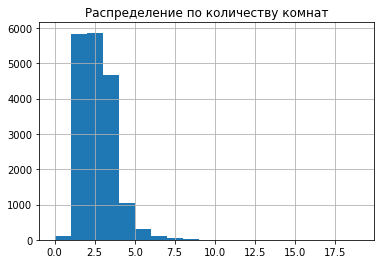

In [506]:
data_filtered['rooms'].hist(bins = 19).set_title('Распределение по количеству комнат')
plt.show()

Посмотрим на квартиры больше 10 комнат, не являются ли они выбросами.

In [196]:
data_filtered.loc[(data_filtered['rooms'] >10)].head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_year,first_day_month,first_day_day,categorized_floor,living_area_correlation,kitchen_area_correlation
502,3,17500000,183,2018-07-01,11,3.40,7,138,7,False,...,0,3500,97.0,95264,2018,7,1,последний,0.754098,0.071038
667,5,25000000,363,2017-12-23,14,3.16,5,222,4,False,...,2,435,418.0,68870,2017,12,23,другой,0.611570,0.044077
4098,20,65000000,590,2019-02-14,15,3.50,6,409,3,False,...,0,3500,14.0,110169,2019,2,14,другой,0.693220,0.169492
7406,8,33000000,194,2017-02-07,11,3.43,5,129,2,False,...,2,66,813.0,170015,2017,2,7,другой,0.664948,0.056701
11060,6,32250000,374,2018-06-09,19,2.65,5,264,2,False,...,2,548,114.0,86091,2018,6,9,другой,0.705882,0.072193
14409,6,28500000,270,2015-03-02,16,3.00,4,180,4,False,...,0,3500,1365.0,105555,2015,3,2,последний,0.666667,0.048148
15882,6,28659000,245,2016-03-31,14,3.16,4,168,2,False,...,2,118,95.0,116784,2016,3,31,другой,0.685714,0.102041


Похоже, что нет. Большое количество комнат сочетается с высоким метражом, а небольшая цена за метр может быть связана с состоянием квартиры. Оставляем без удаления.

**высота потолков**

In [197]:
data_filtered['ceiling_height'].value_counts()

2.500    3005
2.600    2404
2.700    2040
2.550    1325
2.650    1221
         ... 
3.420       1
3.125       1
4.150       1
3.115       1
4.250       1
Name: ceiling_height, Length: 222, dtype: int64

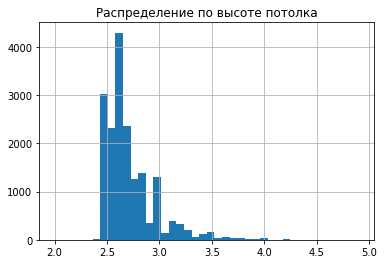

In [507]:
data_filtered['ceiling_height'].hist(bins = 40).set_title('Распределение по высоте потолка')
plt.show()

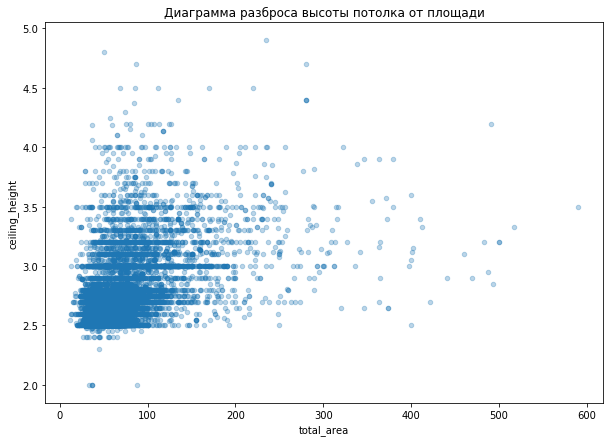

In [508]:
data_filtered.plot(x='total_area', y='ceiling_height', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса высоты потолка от площади')
plt.show()

Больше всего квартир с высотой 2,5 метра, типовая застройка прошлого века. Далее идет снижающаяся высота от 2,6 до 3 метров, и пояс редких значений до 3,5 м. 

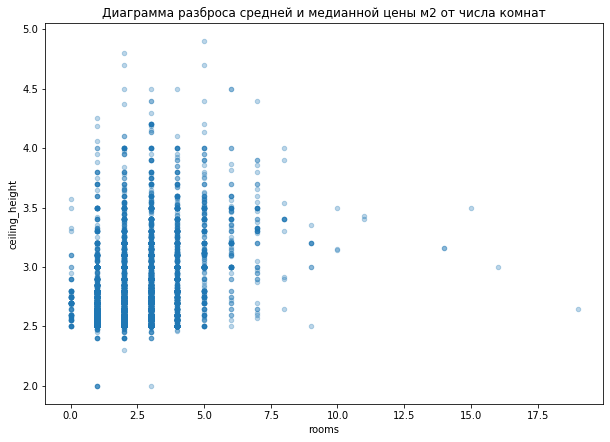

In [509]:
data_filtered.plot(x='rooms', y='ceiling_height', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса высоты потолка от числа комнат')
plt.show()

Примерно такая же картина, но видно, что высоты в студиях укладываются в 2 метра, высоты 1комнатных - до 4, шире всего разброс у пятикомнатных квартир и двухкомнатных.

Интересно, а зависит ли цена от высоты потолков? Возьмем цену за метр для сопоставимости. И, с учетом опыта, цену за метр возьмем в тысячах рублей

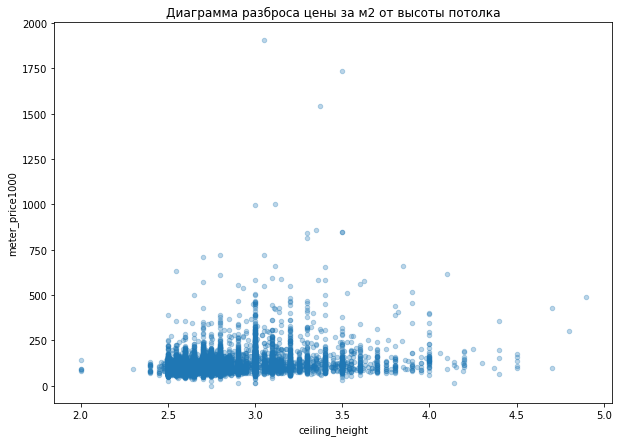

In [510]:
data_filtered['meter_price1000'] = round(data_filtered['meter_price']/1000)

data_filtered.plot(x='ceiling_height', y='meter_price1000', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса цены за м2 от высоты потолка')
plt.show()

Видно, что с ростом высоты потолков нижняя граница цены подрастает. Максимум при сохранении плотности можно увидеть при показателе высоты потоков равном 3, далее от 3 до 4 метров также больше значений, превышающих 200 тыс.рублей. Можно сделать вывод, что высокие потолки являются положительной характеристикой и увеличисвают стоимость.

**Время продажи квартиры**

Изучим время продажи квартиры.

In [202]:
data_filtered['days_exposition'].value_counts()

60.0      505
45.0      490
90.0      228
7.0       190
30.0      188
         ... 
1373.0      1
1057.0      1
103.5       1
871.0       1
954.0       1
Name: days_exposition, Length: 1268, dtype: int64

In [203]:
data_filtered['days_exposition'].describe()

count    18007.000000
mean       176.512329
std        215.521666
min          1.000000
25%         45.000000
50%         95.000000
75%        217.000000
max       1572.000000
Name: days_exposition, dtype: float64

Медиана - 95 дней, среднее - 176.

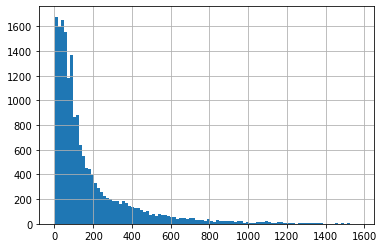

In [204]:
data_filtered['days_exposition'].hist(bins = 100).set_title('Распределение времени продажи')
plt.show()


Необычно выглядит пик около нулевых значений. Квартира - не пирожок, очень редко объявление снимается в тот же день. Объявление - просмотр - договор о задатке - снятие объявления, это требует времени. Следует присмотреться к значениям позднее, возможно размещение фиктивных объявлений с целью манипуляции рыночной стоимостью и другие нарушения(например, дубликаты от недобросовестных риэлторов, которые блокируются собственниками). 

In [205]:
data_filtered[data_filtered['days_exposition'] < 5 ].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_year,first_day_month,first_day_day,living_area_correlation,kitchen_area_correlation,meter_price1000
count,282.000000,2.820000e+02,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,...,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,9.652482,5.887572e+06,53.517730,1.900709,2.694025,10.985816,30.159574,6.000000,9.390071,1.056738,...,0.641844,2259.010638,3.496454,106639.173759,2017.840426,6.812057,15.602837,0.559763,0.183894,106.638298
std,6.480725,4.786616e+06,21.917218,0.899228,0.211479,6.382790,14.454471,4.591498,4.349947,0.766496,...,0.906336,1477.644840,0.541832,38462.987747,0.725291,3.458467,8.223635,0.103292,0.065640,38.458607
min,0.000000,1.190000e+06,14.000000,0.000000,2.500000,3.000000,10.000000,1.000000,1.000000,0.000000,...,0.000000,24.000000,1.000000,17391.000000,2016.000000,1.000000,1.000000,0.141304,0.062500,17.000000
25%,5.000000,3.782500e+06,38.000000,1.000000,2.550000,5.000000,18.000000,3.000000,7.000000,1.000000,...,0.000000,584.250000,3.000000,88725.250000,2017.000000,4.000000,10.000000,0.500000,0.136364,89.000000
50%,9.000000,4.700000e+06,47.000000,2.000000,2.625000,9.000000,28.000000,5.000000,8.500000,1.000000,...,0.000000,3500.000000,4.000000,100000.000000,2018.000000,7.000000,14.000000,0.566915,0.172414,100.000000
75%,14.000000,6.360000e+06,66.750000,3.000000,2.761250,16.000000,39.000000,8.000000,11.000000,1.000000,...,1.000000,3500.000000,4.000000,117078.500000,2018.000000,10.000000,22.000000,0.627907,0.216216,117.000000
max,50.000000,5.100000e+07,147.000000,5.000000,3.750000,35.000000,95.000000,26.000000,32.000000,5.000000,...,3.000000,3500.000000,4.000000,404761.000000,2019.000000,12.000000,31.000000,0.818182,0.428571,405.000000


In [206]:
data_filtered['meter_price1000'].describe()

count    18007.000000
mean       110.486700
std         49.817058
min         15.000000
25%         88.000000
50%        102.000000
75%        121.000000
max       1908.000000
Name: meter_price1000, dtype: float64

In [207]:
data_filtered[data_filtered['days_exposition'] < 5 ]['meter_price1000'].median()

100.0

В среднем, в этих объявлениях ниже стоимость за метр. Минуточку, проверим еще менее 3 дней. 

In [208]:
data_filtered[data_filtered['days_exposition'] < 3 ]['meter_price1000'].median()

104.5

In [209]:
data_filtered['meter_price1000'].mean()

110.48669961681568

In [210]:
data_filtered[data_filtered['days_exposition'] < 5 ]['meter_price1000'].mean()

106.63829787234043

In [211]:
data_filtered[data_filtered['days_exposition'] < 3 ]['meter_price1000'].mean()

150.25

И, оказывается, что по объявлениям со сроком размещения 1-2 дня средняя и медианная стоимость метра выше, чем в среднем по базе. Предположить, что они из себя представляют возможно: передумавшие продавцы, риэлторы, которые выставили чужой объект и объявление сняли. Накрутка рыночной стоимости. Но можно сказать с высокой долей вероятности, что менее 3 дней - это не продажи. Очищаем от них датасет:

In [212]:
data_filtered = data_filtered[data_filtered['days_exposition'] > 2] 

In [213]:
data_filtered['days_exposition'].describe()

count    18003.000000
mean       176.551158
std        215.529862
min          3.000000
25%         45.000000
50%         95.000000
75%        217.000000
max       1572.000000
Name: days_exposition, dtype: float64

In [214]:
data_filtered['meter_price1000'].describe()

count    18003.000000
mean       110.477865
std         49.799156
min         15.000000
25%         88.000000
50%        102.000000
75%        121.000000
max       1908.000000
Name: meter_price1000, dtype: float64

**Вывод** Среднее время продажи - 176 дней, медианное - 95 дней. Мы обнаружили ряд объявлений с коротким временем экспозиции, 1-2 дня и повышенной, по сравнению с общей базой, средней и медианной стоимостью метра. Здесь, вероятно, содержатся объявления передумавших продавцов, риэлторов, которые выставили чужой объект и объявление сняли. Так как эти объявления участвуют в расчете рыночной стоимости - возможна накрутка рыночной стоимости,  с высокой долей вероятности,  менее 3 дней - это не продажи. Мы удалили их из датасета.

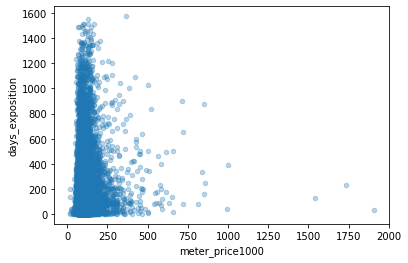

In [215]:
data_filtered.plot(x='meter_price1000', y='days_exposition', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса времени продажи от цены за м2')
plt.show()


Несколько значений цены за метр около миллиона мешают анализу, отсечем их.

In [216]:
data_filtered = data_filtered[data_filtered['meter_price1000'] < 950] 

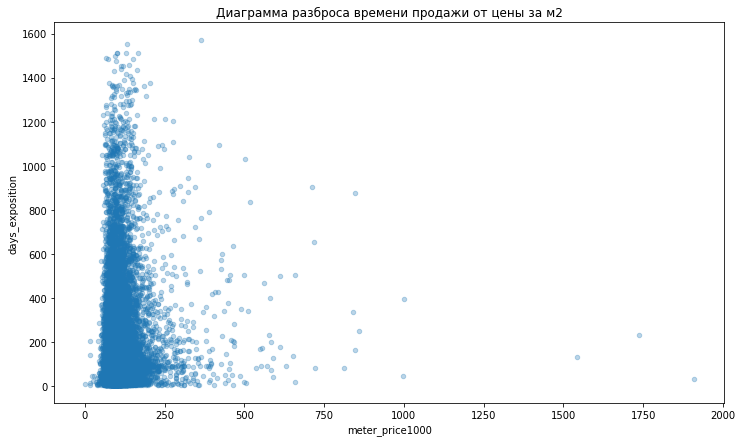

In [512]:
data_filtered.plot(x='meter_price1000', y='days_exposition', kind='scatter', alpha=0.3, figsize = (12, 7))
plt.title('Диаграмма разброса времени продажи от цены за м2')
plt.show()

А что было в исходном датасете?

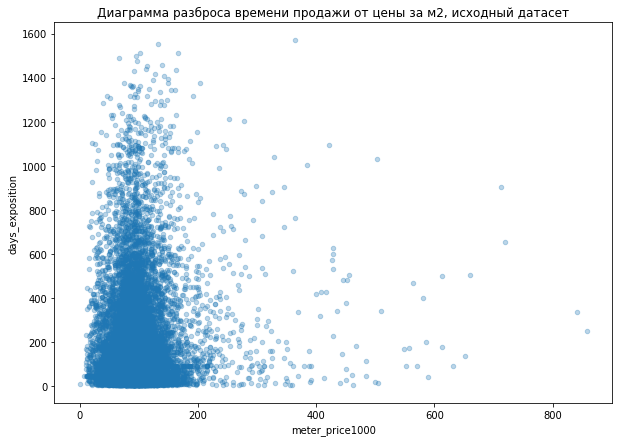

In [513]:
data['meter_price1000'] = round(data['last_price'] / (data['total_area'] * 1000))
data[(~data['days_exposition'].isna())&(data_filtered['days_exposition'] > 2)& (data['meter_price1000'] < 950)].plot(x='meter_price1000', y='days_exposition', kind='scatter', alpha=0.3, figsize = (10, 7))
plt.title('Диаграмма разброса времени продажи от цены за м2, исходный датасет')
plt.show()

Картина схожая, меньше данных, правда. 

In [219]:
data[(~data['days_exposition'].isna())&(data_filtered['days_exposition'] > 2)& (data['meter_price1000'] < 950)]['days_exposition'].median()

96.0

In [220]:
data[(~data['days_exposition'].isna())&(data_filtered['days_exposition'] > 2)& (data['meter_price1000'] < 950)]['days_exposition'].mean()

181.6716283844476

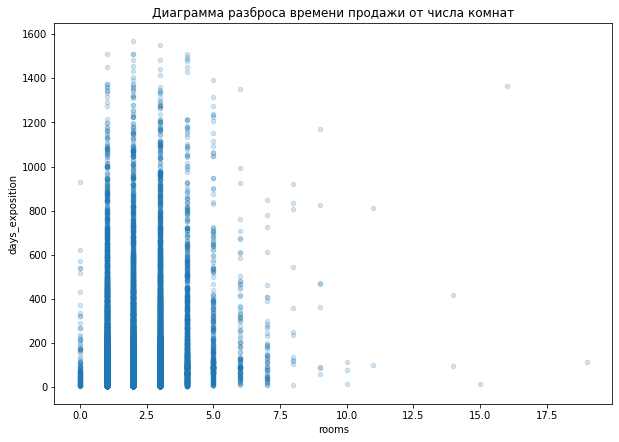

In [514]:
data_filtered.plot(x='rooms', y='days_exposition', kind='scatter', alpha=0.2, figsize = (10, 7))
plt.title('Диаграмма разброса времени продажи от числа комнат')
plt.show()

In [222]:
#перенесем сюда расчет расстояния до центра
data_piter = data_filtered.query('locality_name == "санкт-петербург"')
data_piter['city_center_way'] = (data_piter['citycenters_nearest']/1000).astype('int') + 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


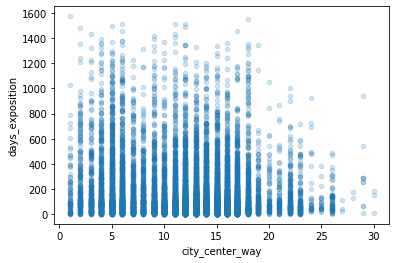

In [223]:
data_piter.plot(x='city_center_way', y='days_exposition', kind='scatter', alpha=0.2, figsize = (10, 7))
plt.title('Диаграмма разброса времени продажи от расстояния до центра')
plt.show()

Проверим гипотезу, что продажи идут необычно долго, если цена квартиры выше среднерыночной. Проверим , что характеризует цену за метр у продаж последнего квартиля, свыше 217 дней.

In [224]:
data_filtered[data_filtered['days_exposition'] > 217 ]['meter_price1000'].mean()

112.66875419369269

И их действительно характеризует повышение средней стоимости квадратного метра до 113 тысяч рублей за метр по сравнению со среднестатистическими 100 тысячами рублей.

**Цена квартиры**

Что влияет на стоимость квартиры?

Метраж

In [225]:
data_filtered['last_price'].corr(data_filtered['total_area'])

0.7263733092246567

Корреляция очевидная, но не  равная единице. Да, большие квартиры стоят больше, чем маленькие. Но огромное количество факторов помимо метража влияют на стоимость, делая корреляцию существенно меньше единицы.

In [226]:
data_filtered['last_price'].corr(data_filtered['rooms'])

0.4372389738762863

Корреляция есть, слабая. Опять - таки, многокомнатные квартиры стоят в общем больше, чем студии и однокомнатные. Но тут еще снижает корреляцию зависимость от метража. 

Год объявления

In [227]:
data_filtered['last_price'].corr(data_filtered['first_day_year'])

-0.05564259419110265

Стоимость не зависит от года объявления, даже немного снижается. А какие, кстати, там годы? Последние два точно не в списке!

In [228]:
data_filtered['first_day_year'].value_counts()

2017    6381
2018    6222
2019    2183
2016    2147
2015     951
2014     114
Name: first_day_year, dtype: int64

C 2014 по 2019 что было предсказуемо. Два последних года изменили бы картину.

In [229]:
data_filtered[data_filtered['first_day_year'] == 2014]['last_price'].min()

3000000

In [230]:
data_filtered[data_filtered['first_day_year'] == 2014]['last_price'].max()

79339000

In [231]:
data_filtered[data_filtered['first_day_year'] == 2014]['last_price'].median()

9239000.0

Объем базы за разные годы несопоставим. Популярность ресурса в 2014 году была еще невысокой, всего 114 объявлений, в основном присутствовали дорогостоящие объекты, медианный уровень - 9,23 млн, стартовый порог - 3 млн. Сопоставимы по объему только 2017 и 2018 год.

In [232]:
data_filtered.pivot_table(index='first_day_year', 
                                       values='last_price', 
                                       aggfunc='median')


,last_price
first_day_year,
2014,9239000
2015,5923340
2016,5200000
2017,5000000
2018,5200000
2019,5650000


Если верить медиане стоимости, то средняя стоимость размещаемых объявлений снижалась с 2014 по 2017 год. И потом ежегодно прирастала.

In [233]:
data_filtered.pivot_table(index='first_day_year', 
                                       values='meter_price', 
                                       aggfunc='median')


,meter_price
first_day_year,
2014,122617.5
2015,99173.0
2016,97777.0
2017,98601.0
2018,103125.0
2019,110580.0


А вот медианная цена  за метр растет с 2016 года. Это свидетельствует об увеличении квартир меньшего метража в продаже с 2014 по 2017 год.

In [234]:
data_filtered['last_price'].corr(data_filtered['citycenters_nearest'])

-0.2597095497973799

Корреляция обратная есть(чем дальше центр, тем меньше стоимость), но слабая. Но ведь в датафрейме разные областные центры, и расстояние, масштаб расстояния, совершенно разный.

Населенные пункты с самой высокой и низкой стоимостью жилья

Выберем самые активные населенные пункты на рынке недвижимости СПб/

In [235]:
data_filtered.groupby('locality_name')['total_area'].count().sort_values(ascending = False).head(10)

locality_name
санкт-петербург      15527
посёлок шушары         436
пушкин                 368
колпино                337
посёлок парголово      327
петергоф               201
сестрорецк             183
красное село           173
ломоносов              132
кронштадт               94
Name: total_area, dtype: int64

10 самых активных населенных пунктов предсказуемо стартуют с Санкт-Петербурга. 

In [236]:
data_top = data_filtered.query('locality_name in ["санкт-петербург", "посёлок шушары", "пушкин",  "колпино",   "посёлок парголово" , "петергоф",  "сестрорецк",   "красное село", "ломоносов",  "кронштадт"]')  

In [237]:
data_top_pivot = data_top.pivot_table(index='locality_name', values='meter_price', aggfunc=['count','mean', 'median','min', 'max'])

In [238]:
data_top_pivot.columns

MultiIndex([( 'count', 'meter_price'),
            (  'mean', 'meter_price'),
            ('median', 'meter_price'),
            (   'min', 'meter_price'),
            (   'max', 'meter_price')],
           )

In [239]:
data_top_pivot.columns = ['count','mean_price', 'median_price', 'min_price', 'max_price' ]


In [240]:
data_top_pivot['mean_price'] = data_top_pivot['mean_price'].astype('int')
data_top_pivot['median_price'] = data_top_pivot['median_price'].astype('int')
display(data_top_pivot.sort_values(by = 'mean_price', ascending = False))

,count,mean_price,median_price,min_price,max_price
locality_name,,,,,
санкт-петербург,15527,114073,104651,15345,857542
пушкин,368,103069,99993,59836,256521
сестрорецк,183,101757,99678,50434,182688
посёлок парголово,327,90175,91642,39205,138522
петергоф,201,84757,82142,51612,225971
кронштадт,94,79433,81364,46641,109090
посёлок шушары,436,78473,76747,47700,147826
колпино,337,75402,74722,47957,125000
ломоносов,132,72609,71817,49166,100000


На первом месте, как и по числу квартир - Петербург. На втором - с не слишком большим отрывом - Пушкин и на 3 - Сестрорецк. Минимальная средняя стоимость метра в Красном Селе. А абсолютный минимум стоимости метра принадлежит Санкт-Петербургу. На втором месте посёлок Парголово с 39 тысяч зща метр и на 3 - Красное Село, 42500 руб. Стоп, 15тысяч в Санкт-Петербурге??? Посмотрим

In [241]:
data_filtered[data_filtered['meter_price'] < 40000]['meter_price'].count()

12

In [242]:
data_filtered[data_filtered['meter_price'] < 40000][['last_price', 'total_area','rooms','kitchen_area','living_area','meter_price1000']].head(12)

,last_price,total_area,rooms,kitchen_area,living_area,meter_price1000
1866,7900000,201,7,20,145,39.0
1918,2300000,65,3,30,33,35.0
2535,3500000,94,3,12,64,37.0
3247,1200000,49,4,5,36,24.0
3740,3500000,94,3,12,64,37.0
5927,4390000,151,6,14,106,29.0
6593,3500000,94,3,12,64,37.0
10480,2100000,80,4,14,23,26.0
13589,1800000,117,5,12,23,15.0
15231,2200000,138,4,13,90,16.0


Я проверила базу я.недвижимости на текущий день, все объекты до 40 000 за м2 - это ошибки(их меньше 20). Поставлен не тот метраж, либо поставлена цена за метр в качестве цены за квартиру. В нашем датафрейме, несмотря на разницу во времени, как минимум половина - тоже ошибки. Большая разница между общей лощадью и площадью жилой + кухня. Неверно указаны параметры при заполнении. Однако, я не буду удалять, поскольку таких значений мало, и кто знает, может быть в Петербурге тех лет был больший контраст. Квартира №15244	2200000 руб	138м2	4 комнаты	13м2 кухня, 90 м2 жилая площадь вполне могла существовать.

Проверим влияние на цену этажа квартиры:

In [243]:
data_floor = data_top.pivot_table(index=['locality_name','categorized_floor'], values='meter_price', aggfunc=['count','mean', 'median'])

In [244]:
data_floor.columns

MultiIndex([( 'count', 'meter_price'),
            (  'mean', 'meter_price'),
            ('median', 'meter_price')],
           )

In [245]:
data_floor.columns = ['count', 'mean','median']
data_floor[ 'mean'] = data_floor[ 'mean'].astype('int')
data_floor.sort_values(by= 'mean', ascending = False)

count    mean    median
locality_name     categorized_floor                         
санкт-петербург   другой             12058  115980  106638.0
                  последний           1879  113359  101724.0
пушкин            последний             85  109676  103625.0
сестрорецк        другой               131  106660  104007.0
пушкин            другой               195  101896   99230.0
санкт-петербург   первый              1590  100450   93343.5
пушкин            первый                88   99288   98929.0
сестрорецк        последний             29   96378   93750.0
посёлок парголово другой               294   91345   92362.0
петергоф          другой               116   86617   84390.5
                  последний             43   82438   80000.0
                  первый                42   81992   76433.0
сестрорецк        первый                23   80609   83125.0
посёлок парголово последний             20   80467   80238.0
кронштадт         последний             17   80107   81920.0
                  другой                55   80098   81818.0
посёлок шушары    другой               326   79168   77315.0
посёлок парголово первый                13   78655   73011.0
посёлок шушары    последний             54   77475   75817.5
кронштадт         первый                22   77248   79823.0
колпино           другой               224   76220   75174.5
посёлок шушары    первый                56   75394   75144.0
колпино           последний             56   74998   71059.0
ломоносов         другой                80   73972   73359.5
красное село      другой               105   73685   73846.0
колпино           первый                57   72583   72948.0
ломоносов         последний             28   72169   72390.0
красное село      последний             43   69547   67187.0
                  первый                25   69025   67272.0
ломоносов         первый                24   68577   67118.0

In [246]:
data_top.pivot_table(index='categorized_floor', values='meter_price', aggfunc=['count','mean', 'median'])

,count,mean,median
,meter_price,meter_price,meter_price
categorized_floor,,,
другой,13584,112645.877208,104081
первый,1940,97012.319072,90773
последний,2254,108709.248891,98435


Довольно предсказуемо, не первый и не последний этах стоит дороже всего, а первый этаж оценивается ниже последнего. Если Вы продаете квартиру на первом этаже - будьте готовы снизить цену.

**расстояние до центра**

In [249]:
data_piter_center = data_piter.pivot_table(index='city_center_way', values='meter_price1000', aggfunc=['count','mean', 'median'])
data_piter_center.columns = ['count','mean', 'median']

#data_piter_center[['mean','median']] = (data_piter_center[['mean','median']]/10000).astype('int')
data_piter_center

,count,mean,median
city_center_way,,,
1,86,187.313953,138.5
2,236,150.817797,124.0
3,306,143.901961,116.0
4,520,126.144231,110.0
5,899,136.858732,126.0
6,761,145.636005,125.0
7,467,151.858672,134.0
8,406,140.605911,125.0
9,664,119.864458,114.0


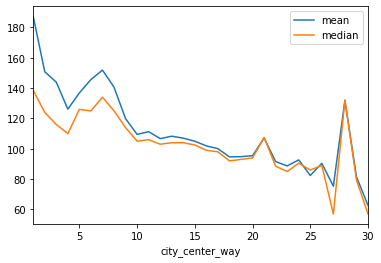

In [250]:

data_piter_center.plot( y=["mean", "median"])
plt.show()


По данным исследования получается, что центр Питера - это площадь внутри кольца диаметром 2 км. Там цена настолько высока, что идет с отрывом от остальных территорий. Далее идет зона, центральная, но не самый центр, до восьмого километра от точки центра, далее идут окраины, от9 до 20 км. На 28 км идет всплеск - это, видимо, влияние областного центра, скорее всего - Сестрорецк, он тоже относится к Питеру. Мы отмечали ранее, что с расстоянием до центра корреляция есть, но не слишком сильная.Проверим теперь, получив данные о распределении средней стоимости при удалении от центра, есть ли корреляция

In [251]:
data_piter_center.reset_index(inplace = True)
data_piter_center.columns
data_piter_center['mean'].corr(data_piter_center['city_center_way'])

-0.8332205943596833

И мы видим, что средняя стоимость квартир имеет обратную корреляцию, очень высокую корреляцию с расстоянием до центра, -0,83. То есть несмотря на то, что престиж и сопоставимость уровня удобства жизни в старинных домах падает, и построенное большое количество модно-стильно-молодежных комплексов за пределами центра Петербурга - чем ближе к центру - тем выше цена.

Теперь посмотрим на отличие характеристик жилья в центре и за его пределами, для этого разобъем массив на 2 группы - пятно центра, с полученным нами радиусом 2 км - и otherworld

In [252]:
data_filtered.query('citycenters_nearest <= 2000').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,first_day_year,first_day_month,first_day_day,living_area_correlation,kitchen_area_correlation,meter_price1000
count,322.000000,3.220000e+02,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,10.105590,1.797766e+07,104.807453,3.245342,3.104185,4.729814,65.139752,2.993789,14.854037,0.757764,...,2.496894,245.751553,255.299689,160570.527950,2017.031056,6.537267,15.096273,0.611682,0.154944,160.565217
std,6.219357,2.150471e+07,63.878537,1.488919,0.411840,1.003877,44.063912,1.378504,10.569771,0.490106,...,0.622769,261.706371,276.717533,108111.373365,1.154282,3.615497,8.369954,0.104314,0.085060,108.105883
min,0.000000,2.400000e+06,12.000000,1.000000,2.500000,2.000000,10.000000,1.000000,0.000000,0.000000,...,0.000000,22.000000,3.000000,57961.000000,2014.000000,1.000000,1.000000,0.252525,0.000000,58.000000
25%,5.000000,8.200000e+06,67.250000,2.000000,2.800000,4.000000,38.000000,2.000000,9.000000,0.000000,...,2.000000,68.250000,71.125000,102500.000000,2016.000000,3.000000,9.000000,0.544183,0.102172,102.000000
50%,10.000000,1.105000e+07,87.500000,3.000000,3.000000,5.000000,51.500000,3.000000,11.000000,1.000000,...,3.000000,193.000000,138.500000,126744.000000,2017.000000,7.000000,14.000000,0.617647,0.129630,127.000000
75%,15.000000,1.683750e+07,120.000000,4.000000,3.350000,5.000000,75.750000,4.000000,17.000000,1.000000,...,3.000000,338.500000,353.750000,172014.500000,2018.000000,10.000000,22.000000,0.684211,0.179521,172.000000
max,26.000000,1.600000e+08,517.000000,11.000000,4.900000,7.000000,332.000000,7.000000,87.000000,4.000000,...,3.000000,3500.000000,1572.000000,848484.000000,2019.000000,12.000000,31.000000,0.882353,0.534247,848.000000


Мы выделили сегмент квартир в центре Петербурга. Предложение квартир на этой территории сильно меньше, чем в остальных районах перебурга. Высота потолков здесь достигает 4,9 м, средняя высота потолка также выше, чем по городу - 3,35 м. Ниже этажность зданий, квартиры расположены от 2 до 7 этажа, на первом в центре обычно коммерческие помещения.

In [253]:
data_piter.query('citycenters_nearest > 2000').describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_nearest,days_exposition,meter_price,first_day_year,first_day_month,first_day_day,living_area_correlation,kitchen_area_correlation,meter_price1000,city_center_way
count,15205.000000,1.520500e+04,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,...,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000,15205.000000
mean,10.190858,7.598383e+06,63.208747,2.146202,2.728464,11.539822,35.676225,6.290760,10.577639,1.081947,...,2020.794344,174.897567,113088.336994,2017.355607,6.424531,15.459849,0.559319,0.181336,113.089378,12.319566
std,5.730980,8.815338e+06,36.985164,1.121294,0.247891,6.354338,22.547222,4.909973,6.108645,0.787042,...,1496.323583,214.610012,42793.079986,1.052872,3.462835,8.634114,0.110746,0.073881,42.793911,4.637662
min,0.000000,1.190000e+06,13.000000,0.000000,2.000000,1.000000,2.000000,1.000000,-46.000000,0.000000,...,13.000000,3.000000,15345.000000,2014.000000,1.000000,1.000000,0.021583,-0.461538,15.000000,3.000000
25%,6.000000,4.200000e+06,41.000000,1.000000,2.550000,6.000000,19.000000,3.000000,7.000000,1.000000,...,521.000000,45.000000,90822.000000,2017.000000,3.000000,8.000000,0.487179,0.129870,91.000000,9.000000
50%,10.000000,5.490000e+06,54.000000,2.000000,2.650000,9.000000,31.000000,5.000000,9.000000,1.000000,...,3500.000000,94.000000,104398.000000,2017.000000,6.000000,15.000000,0.562500,0.166667,104.000000,13.000000
75%,14.000000,7.950000e+06,73.000000,3.000000,2.800000,16.000000,44.000000,9.000000,12.000000,1.000000,...,3500.000000,213.000000,123584.000000,2018.000000,10.000000,23.000000,0.636364,0.225000,124.000000,15.000000
max,50.000000,2.450000e+08,590.000000,19.000000,4.700000,52.000000,409.000000,33.000000,107.000000,5.000000,...,3500.000000,1553.000000,857542.000000,2019.000000,12.000000,31.000000,1.450000,0.787879,858.000000,30.000000


На стоимость квартиры в центре влияют:
    число комнат медианное число 3 в центре, и 2 - в остальной части города.
    этаж - от медианный этаж 3 в центре, и 5 - в остальной части города. Этаж варьируется от 2 до 7 в центре, и от 1 до 33 - в остальной части города.
    удалённость от центра -  медианная стоимость кв.м квартиры  в центре - 127 т.р., и 104 т.р. - в остальной части города.
    метраж квартиры: медиана 87,5 м2 в центре - и 54 в остальной части города.
    Высота потолков - от 2,5 до 4,9 в центре (медиана - 3,35), и от 2 до 4,7 в остальном городе (медиана - 2,65)
    жилая площадь квартиры: медиана 51,5 м2 в центре - и 31 в остальной части города.
То есть квартиры в центре практически по всем рассмотренным параметрам имеют отличия (в сторону преимущества характеристик ) от квартир остальной части города. Кроме времени продажи - медиана в центре - 138 дней, остальной город - 94 дня.

## Общий вывод

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
В базе присутствуют данные за 2014- 2019 годы – 23699 объявлений.


•	таблица содержит пропуски в столбцах, 14 столбцов с пропусками против 8 полностью заполненных.
•	Данные в столбце 'balcony' - non-null float64 являются вещественными числами, необходимо проверить, что это не число балконов.
•	Также имеют неверный тип данных float64, а должен быть int64: last_price, floors_total, cityCenters_nearest, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. Для целей дальнейшей обработки необходимо изменить тип данных на целочисленный.
•	В столбце 'locality_name' данные представлены строками в разных регистрах.
•	Столбцы 'studio' и 'open_plan',вероятно, являются дублирующими,содержат одинаковое число значений, необходима проверка.
•	Наименования столбцов имеют приемлемый вид(нет сочетания строчных и прописных букв, "змеиный" стиль, кроме столбца cityCenters_nearest, соотносятся с информацией в столбцах по смыслу).
•	наименование столбца cityCenters_nearest содержит заглавную букву
Столбцы ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition содержали пропуски значений.

Почти одинаковое количество пропусков в parks_around3000, ponds_around3000 и близкое к ним cityCenters_nearest может быть связано с особенностями формы для заполнения или выгрузкой. Порекомендовать проверить настройки геолокации для предотвращения потери данных, заполняемых системой автоматически.

Проверены корреляции параметров общей площади, жилой площади и площади кухни. Все три параметра имеют высокую корреляцию между собой.

Время продажи
Среднее время продажи - 176 дней, медианное - 95 дней. Мы обнаружили ряд объявлений с коротким временем экспозиции, 1-2 дня и повышенной, по сравнению с общей базой, средней и медианной стоимостью метра. Здесь, вероятно, содержатся объявления передумавших продавцов, риэлторов, которые выставили чужой объект и объявление сняли. Так как эти объявления участвуют в расчете рыночной стоимости - возможна накрутка рыночной стоимости, с высокой долей вероятности, менее 3 дней - это не продажи. Мы удалили их из датасета. После обработки, среднее и медианное отличаются намного меньше. 
В то же время сразу следом, с 3 дней до пяти дней идет пул объявлений со стоимостью квадратного метра ниже среднего. Это похоже на действительно сверхбыстрые продажи, связанные с тем, что объект имеет цену ниже рыночной. Быстрые продажи – до 45 дней. И, наконец, медленные продажи – это продажи длительностью свыше 217 дней (и до 1572 дней), их характеризует повышение средней стоимости квадратного метра до 113 тысяч рублей за метр по сравнению со среднестатистическими 100 тысячами рублей. 
На стоимость квартиры влияет, в первую очередь,её метраж, коэффициент корреляции 0,73.
Количество комнат оказывает слабое влияние, многокомнатные квартиры стоят в общем больше, чем студии и однокомнатные. Но уровень этой корреляции снижает снижает корреляцию зависимость от метража квартиры.
Мы не выявили прямой корреляции стоимости объектов от года продажи. Но объем базы за разные годы несопоставим. Популярность ресурса в 2014 году была еще невысокой, всего 114 объявлений, в основном присутствовали дорогостоящие объекты, медианный уровень стоимости объекта - 9,23 млн, стартовый порог - 3 млн. Сопоставимы по объему только 2017 и 2018 год. С 6381 и 6222 объявлений соответственно.
Первые три года медианная стоимость размещаемых объявлений снижалась с 2014 по 2017 год. И потом ежегодно прирастала. А вот если проверить медианную стоимость квадратного метра, то она была максимальной в 2014 году, 123 т.р/м2, снизилась до 99 т.р/м2 в 2015, еще до 98 т.р/м2 в 2016, и начала расти с 2016 года – 99 т.р/м2 в 2017 году, 103 т.р/м2 - 2018, и 111 т.р/м2 – 2019. И это еще нет последних двух лет!

Мы увидели зависимость между средней стоимостью жилья и удаленностью от центра города, корреляция высокая.
Мы проверили самые активные населенные пункты на рынке недвижимости СПб, на первом месте Санкт-Петербург с 15527 объявлениями, на втором - посёлок Шушары, 436 объявлений, на третьем – г.Пушкин , 368 объявлений. На первом месте по средней стоимости за квадратный метр, как и по числу квартир – Петербург, 114 т.р/м2. На втором - с не слишком большим отрывом - Пушкин – 103 т.р/м2 и на 3 – Сестрорецк – 102 т.р/м2. Минимальная средняя стоимость метра в Красном Селе – 72 т.р/м2. А абсолютный минимум стоимости метра в базе принадлежит Санкт-Петербургу – 15 т.р/м2., и это снова ошибки в объявления – неправильно указанный метраж, либо стоимость за квадратный метр, поставленная как стоимость квартиры. На втором месте посёлок Парголово с 39 тысяч зща метр и на 3 - Красное Село, 42500 руб. 

Проверка влияния на цену этажа квартиры довольно предсказуемо показала, что выше всего оценивается  «другой» этаж, не первый и не последний., а первый этаж оценивается даже ниже последнего. Если Вы продаете квартиру на первом этаже - будьте готовы снизить цену. 

Проверка влияния на цену расстояния до центра показала, что в центре города Санкт-Петербурга есть кольцо, диаметром 4000 м, в котором средняя стоимость кв.м недвижимости выше. Далее идет зона, центральная, но не самый центр, до восьмого километра от точки центра, далее идут окраины, от9 до 20 км. На 28 км идет всплеск - это, видимо, влияние областного центра, скорее всего - Сестрорецк, он тоже относится к Питеру. И средняя стоимость кв. метра имеет сильную обратную связь с удалением от центра.

Мы выделили сегмент квартир в центре Петербурга. Предложение квартир на этой территории сильно меньше, чем в остальных районах перебурга. Высота потолков здесь достигает 4,9 м, средняя высота потолка также выше, чем по городу - 3,35 м. Ниже этажность зданий, квартиры расположены от 2 до 7 этажа, на первом в центре обычно коммерческие помещения.

На стоимость квартиры в центре влияют:
    число комнат медианное число 3 в центре, и 2 - в остальной части города.
    этаж - от медианный этаж 3 в центре, и 5 - в остальной части города. Этаж варьируется от 2 до 7 в центре, и от 1 до 33 - в остальной части города.
    удалённость от центра -  медианная стоимость кв.м квартиры  в центре - 127 т.р., и 104 т.р. - в остальной части города.
    метраж квартиры: медиана 87,5 м2 в центре - и 54 в остальной части города.
    Высота потолков - от 2,5 до 4,9 в центре (медиана - 3,35), и от 2 до 4,7 в остальном городе (медиана - 2,65)
    жилая площадь квартиры: медиана 51,5 м2 в центре - и 31 в остальной части города.

То есть квартиры в центре практически по всем рассмотренным параметрам имеют отличия (в сторону преимущества характеристик ) от квартир остальной части города. Кроме времени продажи - медиана в центре - 138 дней, остальной город - 94 дня.




## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод